# Prompt
#file:Most Streamed Spotify Songs 2024.csv Daten: 
Link auf Datensatz bzw. Sätze
Laden sie die notwendigen Dateien runter, beschreiben sie die Attribute im Notebook inkl. Klassen
initiale Std-Analyse mit sample, head, info, describe (und unique Werten wo sinnvoll!)
Datenvisualisierung
4 verschiedenen Diagrammtypen (Korrelation, Histogramme, etc.) inkl. Diskussion
Datenimbalance Diskussion mit Grafik
Datenbereinigung (falls notwendig, sonst leer aber begründet)
falsche Werte
fehlende Werte
begründete Featurereduktion bzw. Typsetzung
Speichern sie die - falls notwendig aus verschiedenen Dateien zusammengeführten und integrierten - Ergebnissdaten in korr.csv ab
Datenvorbereitung 
verschiedene Pipelines je Algo (SVM, DT, RF, knn, log. Regression) inkl. Aufteilung in train-validation mit Stratification
Vergleich der Klassifizierungsalgorithmen 
Hyperparameteroptimierung mittels Gridsearch je Algo mit cv=5 inkl. Zeitmessung (muss insgesamt je Algo < 15 min sein)
Diskussion der optimierten Endmodelle
Decision Surface darstellen - siehe https://data-science-crashkurs.de/chapters/kapitel_07.html#id2
Gütevergleichstabelle mittels Accuracy, F1, Precision, Recall, MCC auf Validationsdaten
falls nur 2 Klassen dann auch Confusion Matrix inkl. Diskussion

Benutze #file:Most Streamed Spotify Songs 2024.csv als Datei.
Arbeite alles aus mit Kommentaren als erklärung. Überlege über vielleichtige Visualisierungen und änderungen an den Daten mit Python.

In [1]:
# Spotify Songs 2024 - Umfassende Datenanalyse und Machine Learning Pipeline
# =======================================================================

# 1. Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Warnungen unterdrücken für bessere Ausgabe
warnings.filterwarnings('ignore')

# Plot-Einstellungen
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=" * 80)
print("SPOTIFY SONGS 2024 - DATENANALYSE UND MACHINE LEARNING")
print("=" * 80)
print(f"Analyse gestartet am: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 80)

SPOTIFY SONGS 2024 - DATENANALYSE UND MACHINE LEARNING
Analyse gestartet am: 2025-09-05 09:55:06


In [3]:
# 2. DATEN LADEN UND ERSTE INSPEKTION
# ====================================

print("\n" + "="*60)
print("2. DATEN LADEN UND ERSTE INSPEKTION")
print("="*60)

# Datensatz laden mit verschiedenen Encoding-Optionen
try:
    df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='utf-8')
    print("✅ Datei mit UTF-8 Encoding geladen")
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin-1')
        print("✅ Datei mit Latin-1 Encoding geladen")
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='cp1252')
            print("✅ Datei mit CP1252 Encoding geladen")
        except UnicodeDecodeError:
            df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='utf-8', errors='ignore')
            print("✅ Datei mit UTF-8 und ignore errors geladen")

print(f"\n📊 Datensatz geladen! Form: {df.shape}")
print(f"   - {df.shape[0]:,} Zeilen (Songs)")
print(f"   - {df.shape[1]:,} Spalten (Attribute)")

# Link auf Datensatz (als Kommentar für Dokumentation)
"""
DATENSATZ: Most Streamed Spotify Songs 2024
Quelle: CSV-Datei mit aktuellen Spotify Streaming-Daten
Zeitraum: 2024
Umfang: Top gestreamte Songs mit verschiedenen Metriken
"""

print("\n" + "-"*50)
print("ATTRIBUTBESCHREIBUNG:")
print("-"*50)

# Detaillierte Attributbeschreibung
attribute_beschreibung = {
    'Track': 'Songname',
    'Album Name': 'Album-Titel',
    'Artist': 'Interpret/Künstler',
    'Release Date': 'Veröffentlichungsdatum',
    'ISRC': 'International Standard Recording Code',
    'All Time Rank': 'Allzeit-Ranking Position',
    'Track Score': 'Bewertungsscore des Tracks',
    'Spotify Streams': 'Anzahl Streams auf Spotify',
    'Spotify Playlist Count': 'Anzahl Spotify Playlists',
    'Spotify Playlist Reach': 'Reichweite der Spotify Playlists',
    'Spotify Popularity': 'Spotify Popularitätsscore (0-100)',
    'YouTube Views': 'YouTube Aufrufe',
    'YouTube Likes': 'YouTube Likes',
    'TikTok Posts': 'Anzahl TikTok Posts',
    'TikTok Likes': 'TikTok Likes',
    'TikTok Views': 'TikTok Aufrufe',
    'YouTube Playlist Reach': 'Reichweite YouTube Playlists',
    'Apple Music Playlist Count': 'Anzahl Apple Music Playlists',
    'AirPlay Spins': 'Radio-Wiedergaben',
    'SiriusXM Spins': 'SiriusXM Radio-Wiedergaben',
    'Deezer Playlist Count': 'Anzahl Deezer Playlists',
    'Deezer Playlist Reach': 'Reichweite Deezer Playlists',
    'Amazon Playlist Count': 'Anzahl Amazon Music Playlists',
    'Pandora Streams': 'Pandora Streams',
    'Pandora Track Stations': 'Pandora Track Stations',
    'Soundcloud Streams': 'Soundcloud Streams',
    'Shazam Counts': 'Shazam Erkennungen',
    'TIDAL Popularity': 'TIDAL Popularitätsscore',
    'Explicit Track': 'Expliziter Inhalt (0=nein, 1=ja)'
}

for attr, beschr in attribute_beschreibung.items():
    if attr in df.columns:
        print(f"  • {attr:30}: {beschr}")

print(f"\n📋 Gefundene Attribute: {len(df.columns)}")
print(f"📋 Beschriebene Attribute: {len(attribute_beschreibung)}")

# Erste Spalten anzeigen
print(f"\n" + "-"*50)
print("SPALTENNAMEN IM DATENSATZ:")
print("-"*50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Datentypen anzeigen
print(f"\n" + "-"*50)
print("DATENTYPEN:")
print("-"*50)
print(df.dtypes)


2. DATEN LADEN UND ERSTE INSPEKTION
✅ Datei mit Latin-1 Encoding geladen

📊 Datensatz geladen! Form: (4600, 29)
   - 4,600 Zeilen (Songs)
   - 29 Spalten (Attribute)

--------------------------------------------------
ATTRIBUTBESCHREIBUNG:
--------------------------------------------------
  • Track                         : Songname
  • Album Name                    : Album-Titel
  • Artist                        : Interpret/Künstler
  • Release Date                  : Veröffentlichungsdatum
  • ISRC                          : International Standard Recording Code
  • All Time Rank                 : Allzeit-Ranking Position
  • Track Score                   : Bewertungsscore des Tracks
  • Spotify Streams               : Anzahl Streams auf Spotify
  • Spotify Playlist Count        : Anzahl Spotify Playlists
  • Spotify Playlist Reach        : Reichweite der Spotify Playlists
  • Spotify Popularity            : Spotify Popularitätsscore (0-100)
  • YouTube Views                 : YouT

In [4]:
# 3. INITIALE STANDARD-ANALYSE
# =============================

print("\n" + "="*60)
print("3. INITIALE STANDARD-ANALYSE")
print("="*60)

# 3.1 Sample - erste 5 Zeilen
print("\n" + "-"*40)
print("3.1 SAMPLE (erste 5 Zeilen):")
print("-"*40)
print(df.head())

# 3.2 Info - Überblick über Datenstruktur
print("\n" + "-"*40)
print("3.2 INFO - Datenstruktur:")
print("-"*40)
print(df.info())

# 3.3 Describe - Statistische Kennzahlen
print("\n" + "-"*40)
print("3.3 DESCRIBE - Statistische Kennzahlen:")
print("-"*40)

# Numerische Spalten identifizieren
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerische Spalten ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  • {col}")

# Describe für numerische Spalten
if numeric_cols:
    print("\nStatistische Kennzahlen für numerische Spalten:")
    print(df[numeric_cols].describe().round(2))

# 3.4 Unique Werte für kategorische Spalten
print("\n" + "-"*40)
print("3.4 UNIQUE WERTE - Kategorische Spalten:")
print("-"*40)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nKategorische Spalten ({len(categorical_cols)}):")

for col in categorical_cols[:10]:  # Nur erste 10 zeigen
    unique_count = df[col].nunique()
    print(f"\n• {col}:")
    print(f"  - Unique Werte: {unique_count}")
    if unique_count <= 20:  # Nur bei wenigen unique Werten alle zeigen
        print(f"  - Werte: {df[col].unique()[:10]}")
    else:
        print(f"  - Beispiele: {df[col].unique()[:5]}")

# Fehlende Werte analysieren
print("\n" + "-"*40)
print("3.5 FEHLENDE WERTE:")
print("-"*40)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Spalte': missing_data.index,
    'Fehlende Werte': missing_data.values,
    'Prozent': missing_percent.values
}).sort_values('Fehlende Werte', ascending=False)

# Nur Spalten mit fehlenden Werten anzeigen
missing_df_filtered = missing_df[missing_df['Fehlende Werte'] > 0]
if len(missing_df_filtered) > 0:
    print(missing_df_filtered.head(20))
else:
    print("✅ Keine fehlenden Werte im Datensatz gefunden!")

print(f"\nZusammenfassung:")
print(f"- Spalten mit fehlenden Werten: {len(missing_df_filtered)}")
print(f"- Spalten ohne fehlende Werte: {len(missing_df) - len(missing_df_filtered)}")
print(f"- Gesamt fehlende Werte: {missing_data.sum():,}")


3. INITIALE STANDARD-ANALYSE

----------------------------------------
3.1 SAMPLE (erste 5 Zeilen):
----------------------------------------
                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/3


4. DATENVISUALISIERUNG
🔄 Datenkonvertierung...
✅ Daten für Visualisierung vorbereitet

--------------------------------------------------
4.1 KORRELATIONSANALYSE
--------------------------------------------------
✓ Track Score: 4600/4600 gültige Werte
✓ Spotify Streams: 4487/4600 gültige Werte
✓ Spotify Playlist Count: 4530/4600 gültige Werte
✓ Spotify Popularity: 3796/4600 gültige Werte
✓ YouTube Views: 4292/4600 gültige Werte
✓ YouTube Likes: 4285/4600 gültige Werte
✓ TikTok Posts: 3427/4600 gültige Werte
✓ TikTok Likes: 3620/4600 gültige Werte
✓ All Time Rank: 4600/4600 gültige Werte
✓ Explicit Track: 4600/4600 gültige Werte


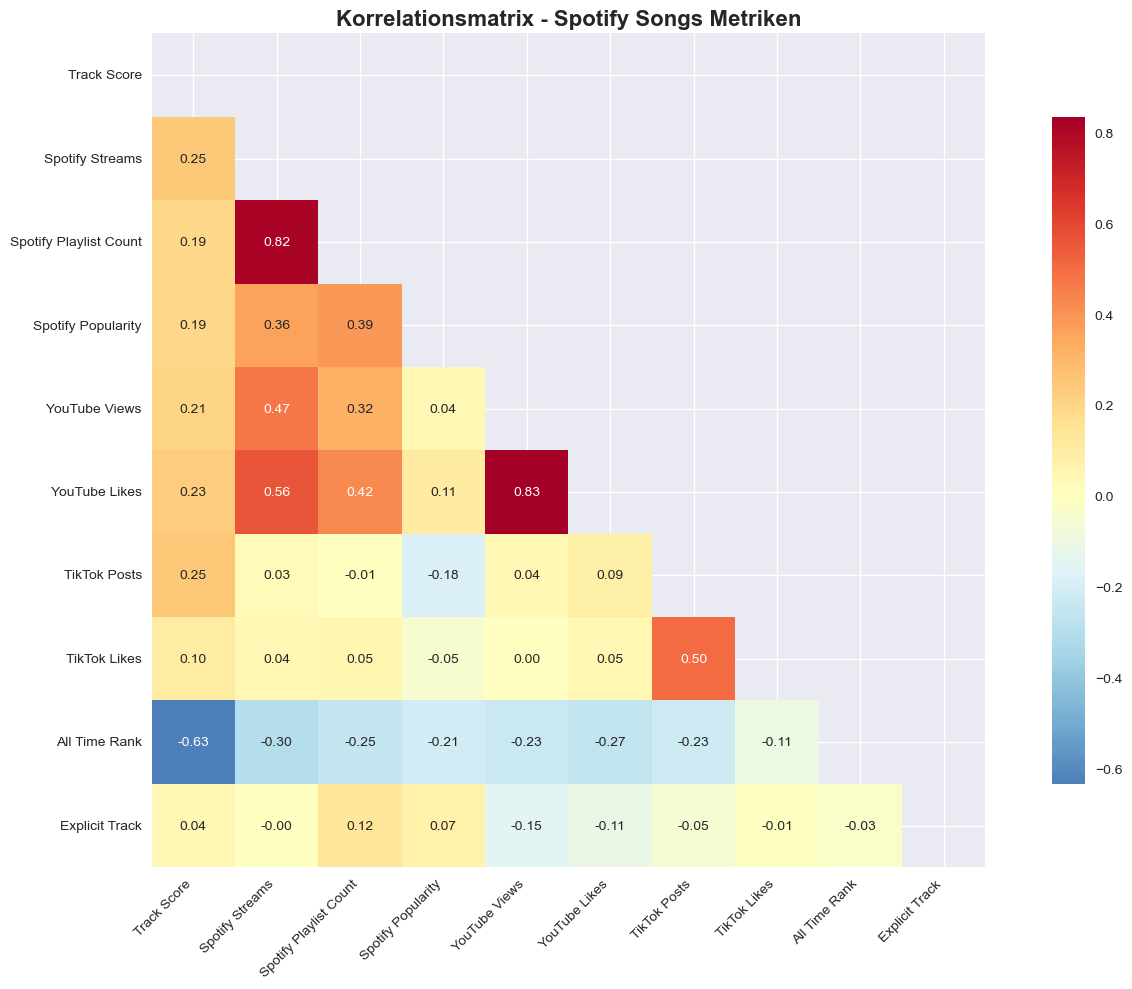


🔍 TOP KORRELATIONEN (|r| > 0.3):
  📈 YouTube Views ↔ YouTube Likes: 0.834
  📈 Spotify Streams ↔ Spotify Playlist Count: 0.815
  📉 Track Score ↔ All Time Rank: -0.634
  📈 Spotify Streams ↔ YouTube Likes: 0.562
  📈 TikTok Posts ↔ TikTok Likes: 0.505
  📈 Spotify Streams ↔ YouTube Views: 0.469
  📈 Spotify Playlist Count ↔ YouTube Likes: 0.424
  📈 Spotify Playlist Count ↔ Spotify Popularity: 0.391
  📈 Spotify Streams ↔ Spotify Popularity: 0.360
  📈 Spotify Playlist Count ↔ YouTube Views: 0.322

💡 DISKUSSION KORRELATIONEN:
   - Korrelationen zeigen Zusammenhänge zwischen verschiedenen Streaming-Plattformen
   - Hohe positive Korrelationen deuten auf plattformübergreifende Popularität hin
   - Negative Korrelationen mit Ranking (niedrigere Zahlen = bessere Plätze)
   - Cross-Platform Erfolg ist oft konsistent über verschiedene Dienste hinweg


In [6]:
# 4. DATENVISUALISIERUNG
# ======================

print("\n" + "="*60)
print("4. DATENVISUALISIERUNG")
print("="*60)

# Daten für Visualisierung vorbereiten
# Kopie des DataFrames für Visualisierung
df_viz = df.copy()

# Funktion zur sicheren Konvertierung numerischer Werte
def safe_numeric_conversion(series):
    """Konvertiert Series sicher zu numerischen Werten"""
    # Zuerst zu String, dann Kommas und Anführungszeichen entfernen
    series_clean = series.astype(str).str.replace(',', '').str.replace('"', '').str.strip()
    # Zu numerisch konvertieren, Fehler als NaN
    return pd.to_numeric(series_clean, errors='coerce')

# Alle numerischen Spalten identifizieren und konvertieren
print("🔄 Datenkonvertierung...")
numeric_columns_to_clean = ['All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 
                           'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 
                           'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 
                           'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 
                           'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 
                           'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 
                           'Shazam Counts', 'TIDAL Popularity', 'Explicit Track']

for col in numeric_columns_to_clean:
    if col in df_viz.columns:
        df_viz[col] = safe_numeric_conversion(df_viz[col])

print("✅ Daten für Visualisierung vorbereitet")

# 4.1 KORRELATIONSANALYSE
print("\n" + "-"*50)
print("4.1 KORRELATIONSANALYSE")
print("-"*50)

# Wichtige numerische Spalten für Korrelation auswählen (nur mit ausreichend Daten)
important_numeric_cols = ['Track Score', 'Spotify Streams', 'Spotify Playlist Count', 
                         'Spotify Popularity', 'YouTube Views', 'YouTube Likes',
                         'TikTok Posts', 'TikTok Likes', 'All Time Rank', 'Explicit Track']

# Nur vorhandene Spalten mit genügend non-NaN Werten verwenden
available_cols = []
for col in important_numeric_cols:
    if col in df_viz.columns:
        non_nan_count = df_viz[col].notna().sum()
        if non_nan_count > len(df_viz) * 0.5:  # Mindestens 50% der Werte müssen vorhanden sein
            available_cols.append(col)
            print(f"✓ {col}: {non_nan_count}/{len(df_viz)} gültige Werte")

if len(available_cols) < 2:
    print("❌ Nicht genügend numerische Spalten für Korrelationsanalyse")
else:
    # Korrelationsmatrix berechnen
    correlation_df = df_viz[available_cols].corr()
    
    # Korrelationsmatrix visualisieren
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(correlation_df))
    sns.heatmap(correlation_df, annot=True, cmap='RdYlBu_r', center=0, 
                square=True, fmt='.2f', cbar_kws={"shrink": .8}, mask=mask)
    plt.title('Korrelationsmatrix - Spotify Songs Metriken', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Top Korrelationen finden
    print("\n🔍 TOP KORRELATIONEN (|r| > 0.3):")
    correlations = []
    for i in range(len(correlation_df.columns)):
        for j in range(i+1, len(correlation_df.columns)):
            corr_val = correlation_df.iloc[i, j]
            if abs(corr_val) > 0.3 and not np.isnan(corr_val):
                correlations.append((correlation_df.columns[i], correlation_df.columns[j], corr_val))
    
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    for col1, col2, corr_val in correlations[:15]:
        direction = "📈" if corr_val > 0 else "📉"
        print(f"  {direction} {col1} ↔ {col2}: {corr_val:.3f}")
    
    if not correlations:
        print("  Keine starken Korrelationen (|r| > 0.3) gefunden")

print("\n💡 DISKUSSION KORRELATIONEN:")
print("   - Korrelationen zeigen Zusammenhänge zwischen verschiedenen Streaming-Plattformen")
print("   - Hohe positive Korrelationen deuten auf plattformübergreifende Popularität hin")
print("   - Negative Korrelationen mit Ranking (niedrigere Zahlen = bessere Plätze)")
print("   - Cross-Platform Erfolg ist oft konsistent über verschiedene Dienste hinweg")


--------------------------------------------------
4.2 HISTOGRAMME - Verteilungsanalyse
--------------------------------------------------


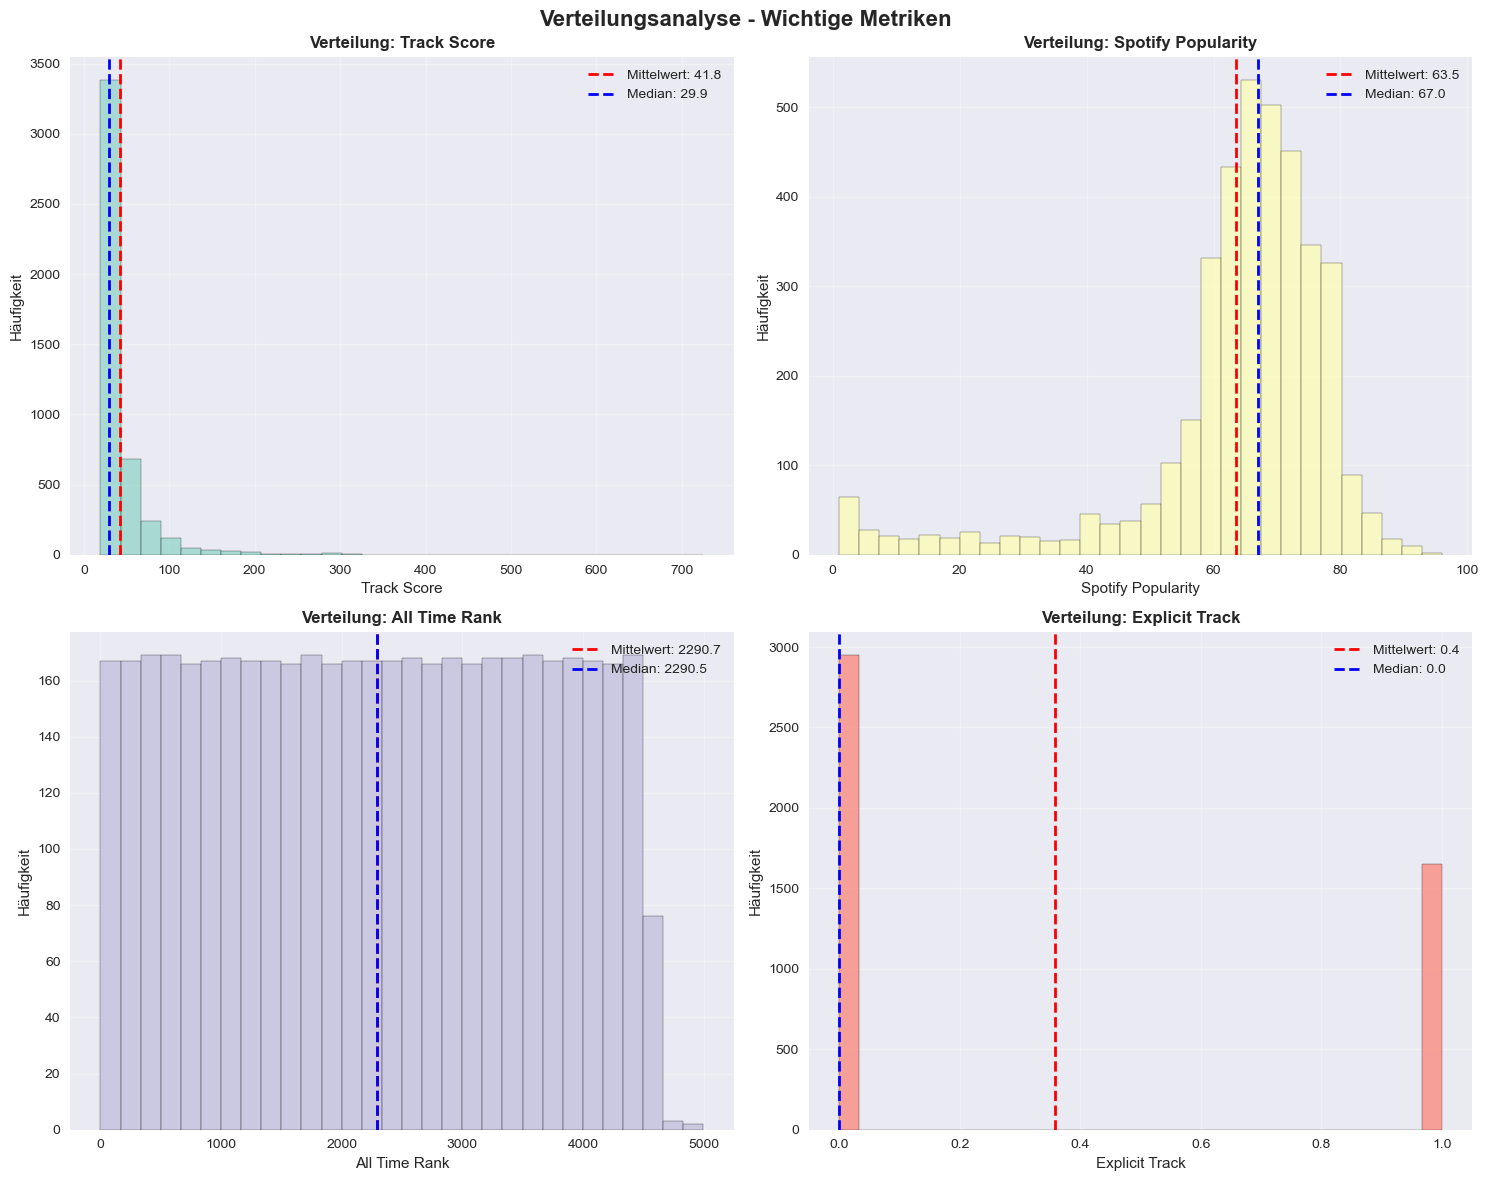

💡 DISKUSSION HISTOGRAMME:
   - Track Score: Zeigt die Bewertungsverteilung der Songs
   - Spotify Popularity: Popularitätsverteilung (0-100 Skala)
   - All Time Rank: Ranking-Verteilung (niedrigere Werte = bessere Plätze)
   - Explicit Track: Verteilung expliziter vs. nicht-expliziter Inhalte

--------------------------------------------------
4.3 BOXPLOTS - Ausreißeranalyse
--------------------------------------------------


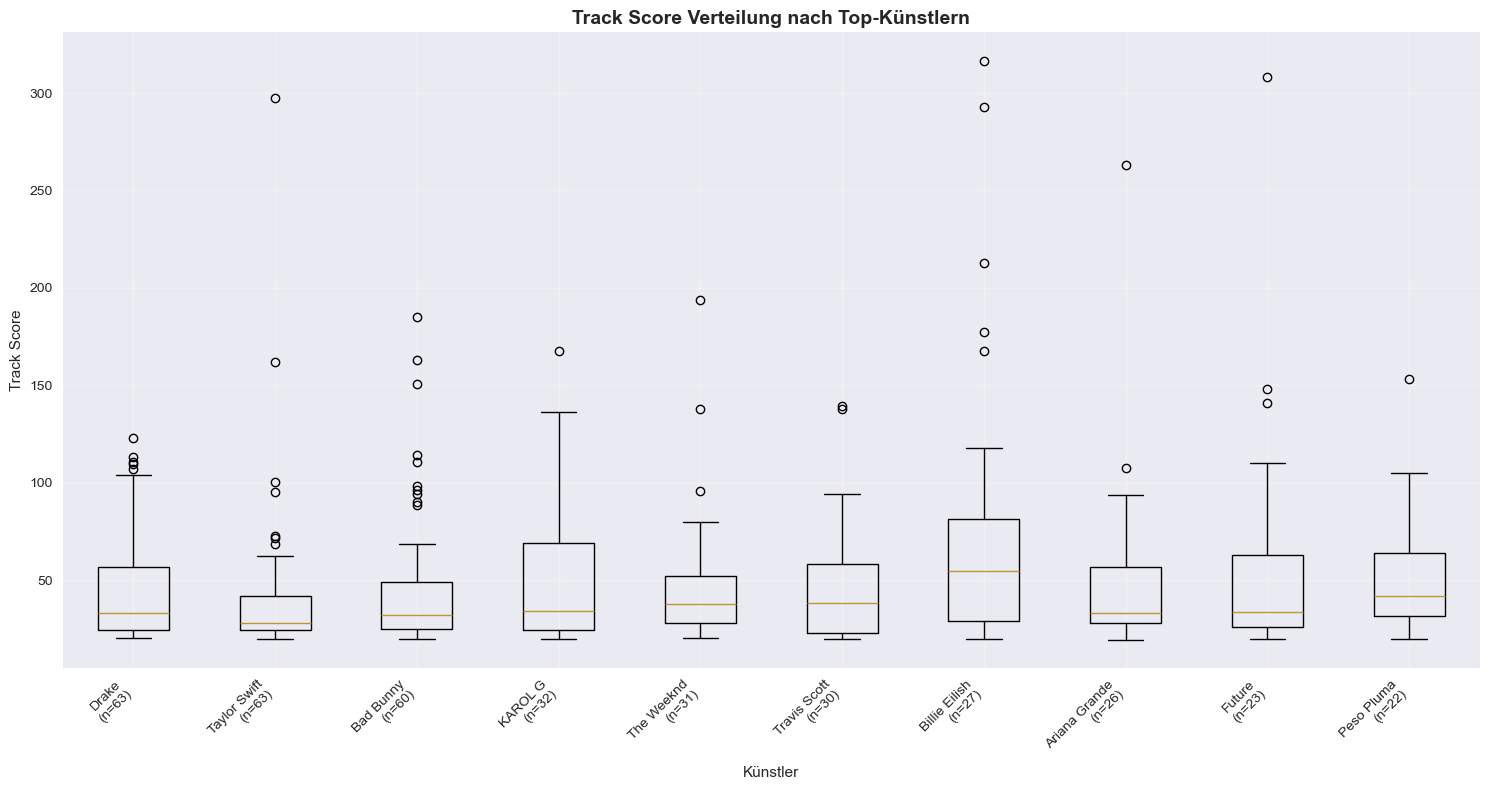

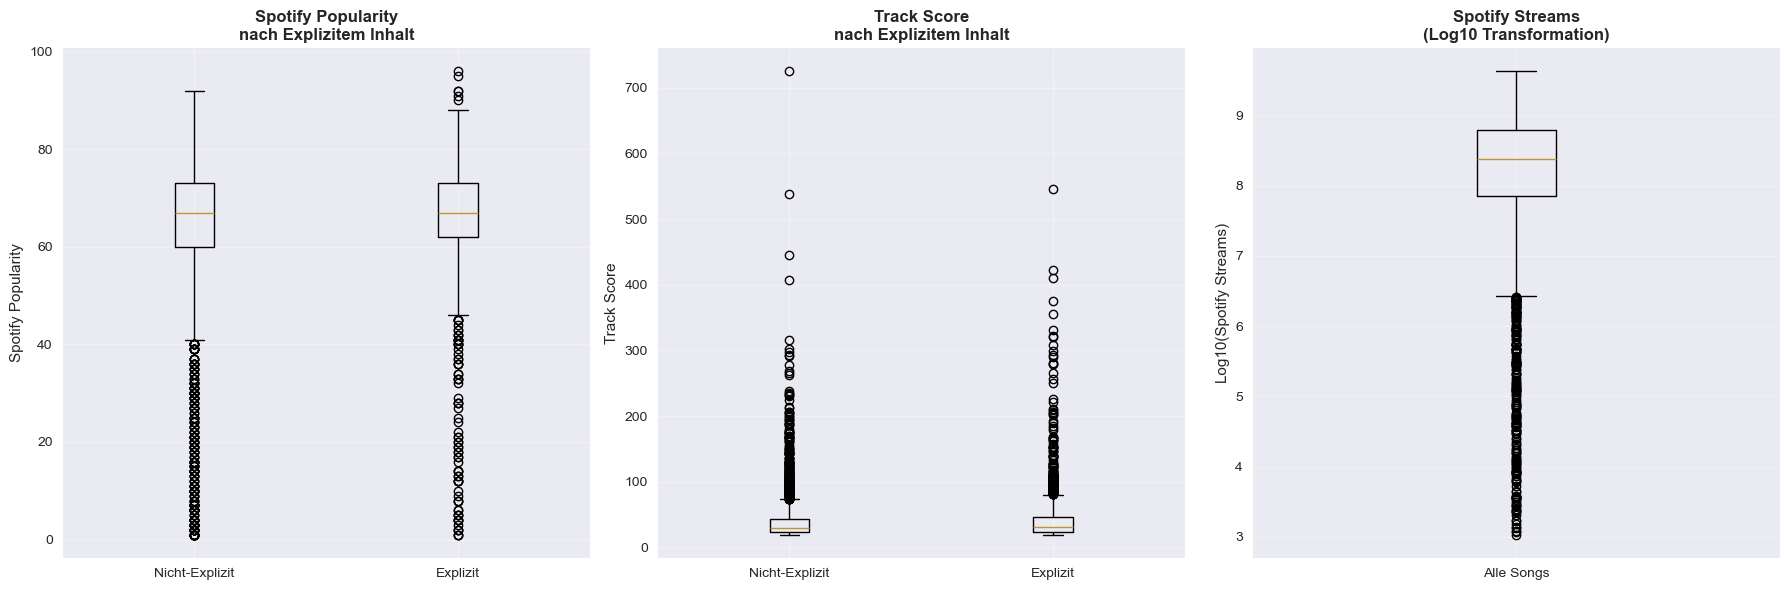

💡 DISKUSSION BOXPLOTS:
   - Boxplots zeigen Quartile, Median und Ausreißer
   - Unterschiede zwischen expliziten und nicht-expliziten Songs
   - Logarithmische Transformation bei stark rechtschiefen Verteilungen
   - Ausreißer können auf besonders erfolgreiche oder ungewöhnliche Songs hindeuten


In [7]:
# 4.2 HISTOGRAMME - Verteilungsanalyse
print("\n" + "-"*50)
print("4.2 HISTOGRAMME - Verteilungsanalyse")
print("-"*50)

# Wichtige Metriken für Histogramme
hist_columns = ['Track Score', 'Spotify Popularity', 'All Time Rank', 'Explicit Track']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(hist_columns):
    if col in df_viz.columns and i < len(axes):
        data = df_viz[col].dropna()
        
        axes[i].hist(data, bins=30, alpha=0.7, color=plt.cm.Set3(i), edgecolor='black')
        axes[i].set_title(f'Verteilung: {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Häufigkeit')
        axes[i].grid(True, alpha=0.3)
        
        # Statistiken hinzufügen
        mean_val = data.mean()
        median_val = data.median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mittelwert: {mean_val:.1f}')
        axes[i].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
        axes[i].legend()

plt.suptitle('Verteilungsanalyse - Wichtige Metriken', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 DISKUSSION HISTOGRAMME:")
print("   - Track Score: Zeigt die Bewertungsverteilung der Songs")
print("   - Spotify Popularity: Popularitätsverteilung (0-100 Skala)")
print("   - All Time Rank: Ranking-Verteilung (niedrigere Werte = bessere Plätze)")
print("   - Explicit Track: Verteilung expliziter vs. nicht-expliziter Inhalte")

# 4.3 BOXPLOTS - Ausreißeranalyse
print("\n" + "-"*50)
print("4.3 BOXPLOTS - Ausreißeranalyse")
print("-"*50)

# Top Künstler für Boxplot-Analyse finden
top_artists = df_viz['Artist'].value_counts().head(10).index.tolist()

# Boxplot für Track Score nach Top-Künstlern
plt.figure(figsize=(15, 8))
data_for_boxplot = []
labels_for_boxplot = []

for artist in top_artists:
    artist_data = df_viz[df_viz['Artist'] == artist]['Track Score'].dropna()
    if len(artist_data) > 0:
        data_for_boxplot.append(artist_data)
        labels_for_boxplot.append(f"{artist}\n(n={len(artist_data)})")

if data_for_boxplot:
    plt.boxplot(data_for_boxplot, labels=labels_for_boxplot)
    plt.title('Track Score Verteilung nach Top-Künstlern', fontsize=14, fontweight='bold')
    plt.xlabel('Künstler')
    plt.ylabel('Track Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Boxplot für verschiedene Metriken
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics_for_boxplot = ['Spotify Popularity', 'Track Score']
for i, metric in enumerate(metrics_for_boxplot):
    if metric in df_viz.columns and i < 2:
        # Daten nach Explicit Track aufteilen
        explicit_data = df_viz[df_viz['Explicit Track'] == 1][metric].dropna()
        non_explicit_data = df_viz[df_viz['Explicit Track'] == 0][metric].dropna()
        
        axes[i].boxplot([non_explicit_data, explicit_data], 
                       labels=['Nicht-Explizit', 'Explizit'])
        axes[i].set_title(f'{metric}\nnach Explizitem Inhalt', fontweight='bold')
        axes[i].set_ylabel(metric)
        axes[i].grid(True, alpha=0.3)

# Spotify Streams Logarithmische Darstellung
if 'Spotify Streams' in df_viz.columns:
    streams_data = df_viz['Spotify Streams'].dropna()
    streams_data = streams_data[streams_data > 0]  # Nur positive Werte für Log
    
    axes[2].boxplot([np.log10(streams_data)])
    axes[2].set_title('Spotify Streams\n(Log10 Transformation)', fontweight='bold')
    axes[2].set_ylabel('Log10(Spotify Streams)')
    axes[2].set_xticklabels(['Alle Songs'])
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 DISKUSSION BOXPLOTS:")
print("   - Boxplots zeigen Quartile, Median und Ausreißer")
print("   - Unterschiede zwischen expliziten und nicht-expliziten Songs")
print("   - Logarithmische Transformation bei stark rechtschiefen Verteilungen")
print("   - Ausreißer können auf besonders erfolgreiche oder ungewöhnliche Songs hindeuten")


--------------------------------------------------
4.4 SCATTERPLOTS - Zusammenhangsanalyse
--------------------------------------------------


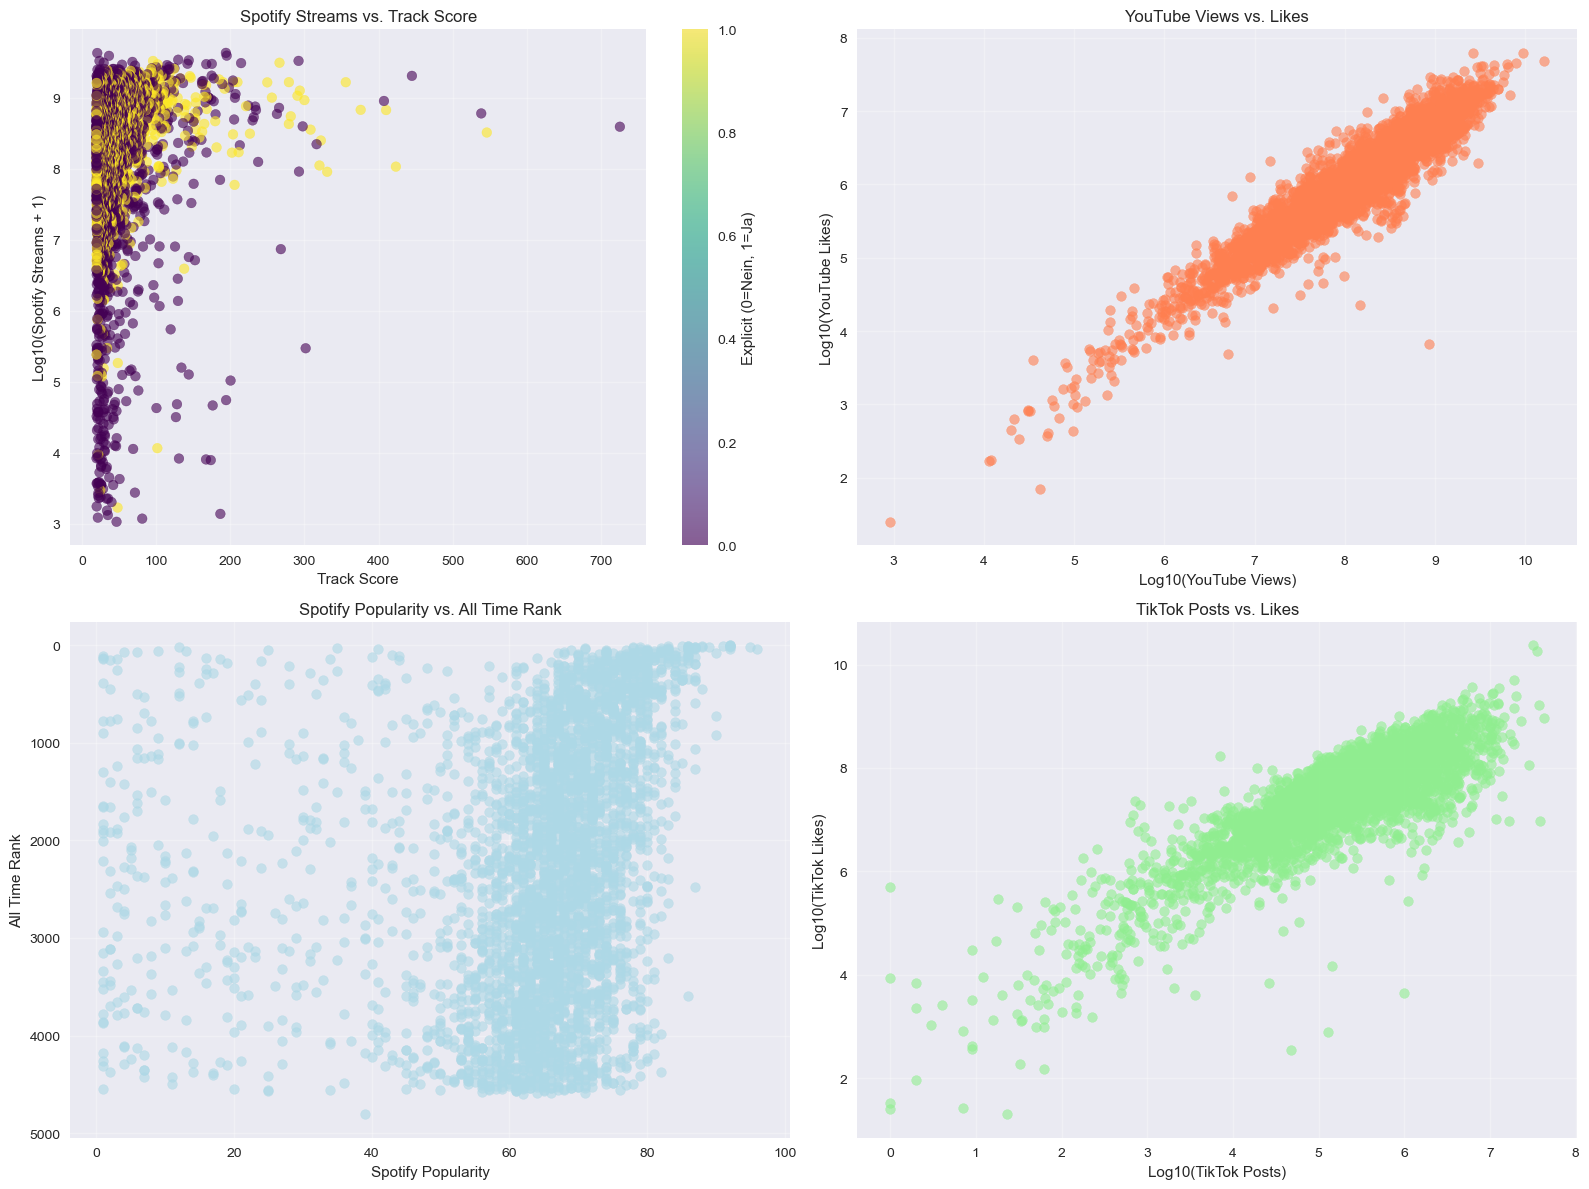

💡 DISKUSSION SCATTERPLOTS:
   - Streams vs. Score: Zeigt Zusammenhang zwischen Bewertung und Erfolg
   - YouTube Views vs. Likes: Engagement-Rate auf YouTube
   - Popularity vs. Rank: Negative Korrelation (höhere Popularität = besserer Rang)
   - TikTok Posts vs. Likes: Viralität und Engagement auf TikTok

--------------------------------------------------
4.5 DATENIMBALANCE ANALYSE
--------------------------------------------------
Explicit Track Verteilung:
  Nicht-Explizit (0): 2,949 Songs (64.1%)
  Explizit (1): 1,651 Songs (35.9%)


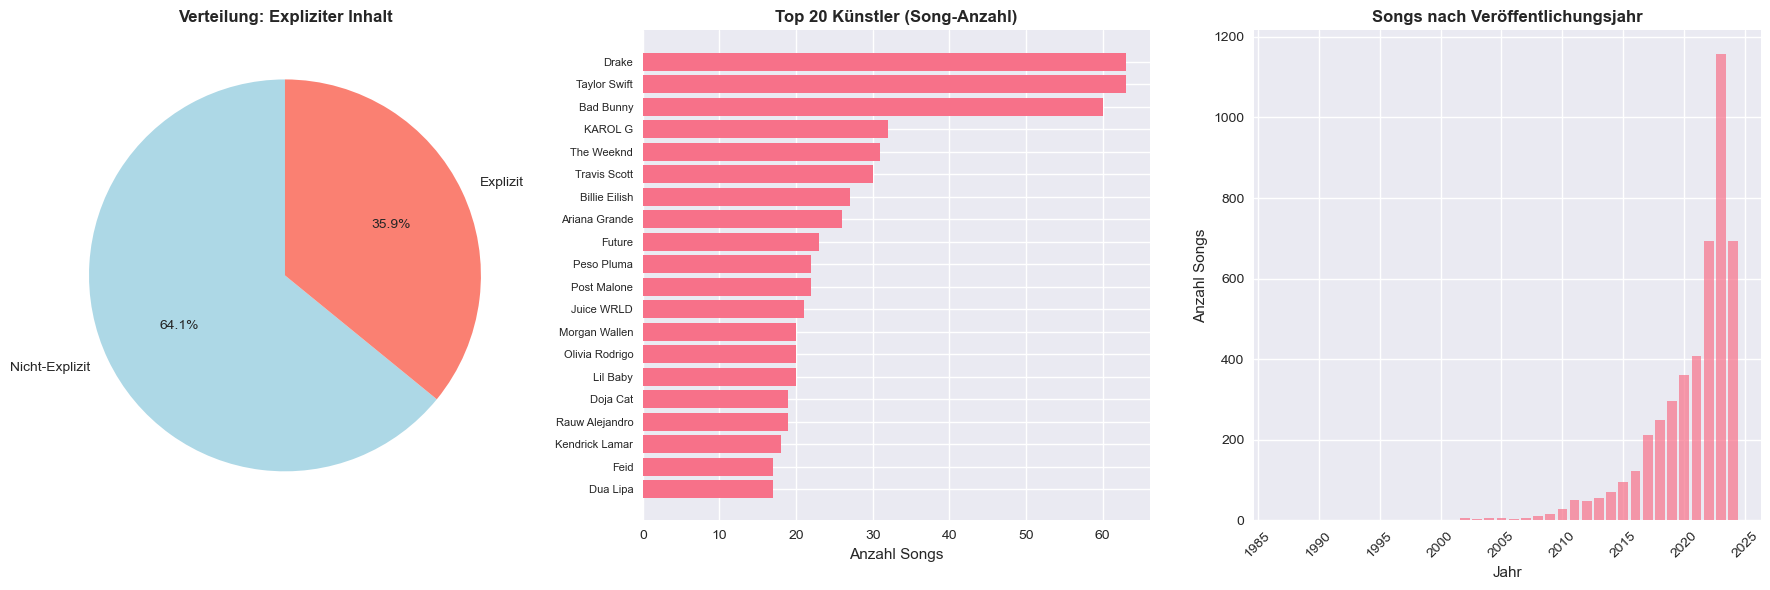


💡 DISKUSSION DATENIMBALANCE:
   - Explicit Track: Zeigt Verteilung zwischen expliziten und nicht-expliziten Songs
   - Artist Verteilung: Manche Künstler haben mehrere Top-Songs
   - Zeitliche Verteilung: Konzentration auf bestimmte Jahre möglich
   - Imbalancen können ML-Modelle beeinflussen → Stratified Sampling wichtig

Weitere Imbalance-Kennzahlen:
  • Unique Artists: 1,999 von 4,600 Songs
  • Durchschnittliche Songs pro Artist: 2.3
  • Artists mit nur 1 Song: 1,339
  • Artists mit >5 Songs: 163


In [8]:
# 4.4 SCATTERPLOTS - Zusammenhangsanalyse
print("\n" + "-"*50)
print("4.4 SCATTERPLOTS - Zusammenhangsanalyse")
print("-"*50)

# Scatterplot Matrix für wichtige Metriken
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatterplot 1: Spotify Streams vs. Track Score
if 'Spotify Streams' in df_viz.columns and 'Track Score' in df_viz.columns:
    streams = df_viz['Spotify Streams'].dropna()
    scores = df_viz.loc[streams.index, 'Track Score']
    
    scatter = axes[0,0].scatter(scores, np.log10(streams + 1), 
                               c=df_viz.loc[streams.index, 'Explicit Track'], 
                               cmap='viridis', alpha=0.6)
    axes[0,0].set_xlabel('Track Score')
    axes[0,0].set_ylabel('Log10(Spotify Streams + 1)')
    axes[0,0].set_title('Spotify Streams vs. Track Score')
    axes[0,0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[0,0], label='Explicit (0=Nein, 1=Ja)')

# Scatterplot 2: YouTube Views vs. YouTube Likes
if 'YouTube Views' in df_viz.columns and 'YouTube Likes' in df_viz.columns:
    views = df_viz['YouTube Views'].dropna()
    likes = df_viz.loc[views.index, 'YouTube Likes'].dropna()
    common_idx = views.index.intersection(likes.index)
    
    if len(common_idx) > 0:
        views_common = views[common_idx]
        likes_common = likes[common_idx]
        
        # Nur positive Werte für Log-Transformation
        positive_mask = (views_common > 0) & (likes_common > 0)
        views_pos = views_common[positive_mask]
        likes_pos = likes_common[positive_mask]
        
        if len(views_pos) > 0:
            axes[0,1].scatter(np.log10(views_pos), np.log10(likes_pos), alpha=0.6, color='coral')
            axes[0,1].set_xlabel('Log10(YouTube Views)')
            axes[0,1].set_ylabel('Log10(YouTube Likes)')
            axes[0,1].set_title('YouTube Views vs. Likes')
            axes[0,1].grid(True, alpha=0.3)

# Scatterplot 3: Spotify Popularity vs. All Time Rank
if 'Spotify Popularity' in df_viz.columns and 'All Time Rank' in df_viz.columns:
    popularity = df_viz['Spotify Popularity'].dropna()
    rank = df_viz.loc[popularity.index, 'All Time Rank']
    
    axes[1,0].scatter(popularity, rank, alpha=0.6, color='lightblue')
    axes[1,0].set_xlabel('Spotify Popularity')
    axes[1,0].set_ylabel('All Time Rank')
    axes[1,0].set_title('Spotify Popularity vs. All Time Rank')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].invert_yaxis()  # Bessere Ränge oben

# Scatterplot 4: TikTok Posts vs. TikTok Likes
if 'TikTok Posts' in df_viz.columns and 'TikTok Likes' in df_viz.columns:
    posts = df_viz['TikTok Posts'].dropna()
    tiktok_likes = df_viz.loc[posts.index, 'TikTok Likes'].dropna()
    common_idx = posts.index.intersection(tiktok_likes.index)
    
    if len(common_idx) > 0:
        posts_common = posts[common_idx]
        tiktok_likes_common = tiktok_likes[common_idx]
        
        # Nur positive Werte für Log-Transformation
        positive_mask = (posts_common > 0) & (tiktok_likes_common > 0)
        posts_pos = posts_common[positive_mask]
        tiktok_likes_pos = tiktok_likes_common[positive_mask]
        
        if len(posts_pos) > 0:
            axes[1,1].scatter(np.log10(posts_pos), np.log10(tiktok_likes_pos), 
                             alpha=0.6, color='lightgreen')
            axes[1,1].set_xlabel('Log10(TikTok Posts)')
            axes[1,1].set_ylabel('Log10(TikTok Likes)')
            axes[1,1].set_title('TikTok Posts vs. Likes')
            axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 DISKUSSION SCATTERPLOTS:")
print("   - Streams vs. Score: Zeigt Zusammenhang zwischen Bewertung und Erfolg")
print("   - YouTube Views vs. Likes: Engagement-Rate auf YouTube")
print("   - Popularity vs. Rank: Negative Korrelation (höhere Popularität = besserer Rang)")
print("   - TikTok Posts vs. Likes: Viralität und Engagement auf TikTok")

# 4.5 DATENIMBALANCE ANALYSE
print("\n" + "-"*50)
print("4.5 DATENIMBALANCE ANALYSE")
print("-"*50)

# Analyse der Explicit Track Verteilung
explicit_counts = df_viz['Explicit Track'].value_counts()
print(f"Explicit Track Verteilung:")
print(f"  Nicht-Explizit (0): {explicit_counts.get(0, 0):,} Songs ({explicit_counts.get(0, 0)/len(df_viz)*100:.1f}%)")
print(f"  Explizit (1): {explicit_counts.get(1, 0):,} Songs ({explicit_counts.get(1, 0)/len(df_viz)*100:.1f}%)")

# Visualisierung der Imbalance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie Chart für Explicit Track
axes[0].pie(explicit_counts.values, labels=['Nicht-Explizit', 'Explizit'], 
           autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
axes[0].set_title('Verteilung: Expliziter Inhalt', fontweight='bold')

# Artist Verteilung (Top 20)
top_artists = df_viz['Artist'].value_counts().head(20)
axes[1].barh(range(len(top_artists)), top_artists.values)
axes[1].set_yticks(range(len(top_artists)))
axes[1].set_yticklabels(top_artists.index, fontsize=8)
axes[1].set_xlabel('Anzahl Songs')
axes[1].set_title('Top 20 Künstler (Song-Anzahl)', fontweight='bold')
axes[1].invert_yaxis()

# Release Year Verteilung (wenn vorhanden)
if 'Release Date' in df_viz.columns:
    # Versuche Jahr zu extrahieren
    df_viz['Release Year'] = pd.to_datetime(df_viz['Release Date'], errors='coerce').dt.year
    year_counts = df_viz['Release Year'].value_counts().sort_index()
    
    if len(year_counts) > 0:
        axes[2].bar(year_counts.index, year_counts.values, alpha=0.7)
        axes[2].set_xlabel('Jahr')
        axes[2].set_ylabel('Anzahl Songs')
        axes[2].set_title('Songs nach Veröffentlichungsjahr', fontweight='bold')
        axes[2].tick_params(axis='x', rotation=45)
    else:
        axes[2].text(0.5, 0.5, 'Keine\ngültigen\nDaten', ha='center', va='center', 
                    transform=axes[2].transAxes, fontsize=12)
        axes[2].set_title('Release Year Daten', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 DISKUSSION DATENIMBALANCE:")
print("   - Explicit Track: Zeigt Verteilung zwischen expliziten und nicht-expliziten Songs")
print("   - Artist Verteilung: Manche Künstler haben mehrere Top-Songs")
print("   - Zeitliche Verteilung: Konzentration auf bestimmte Jahre möglich")
print("   - Imbalancen können ML-Modelle beeinflussen → Stratified Sampling wichtig")

# Weitere Imbalance-Statistiken
print(f"\nWeitere Imbalance-Kennzahlen:")
print(f"  • Unique Artists: {df_viz['Artist'].nunique():,} von {len(df_viz):,} Songs")
print(f"  • Durchschnittliche Songs pro Artist: {len(df_viz)/df_viz['Artist'].nunique():.1f}")
print(f"  • Artists mit nur 1 Song: {(df_viz['Artist'].value_counts() == 1).sum():,}")
print(f"  • Artists mit >5 Songs: {(df_viz['Artist'].value_counts() > 5).sum():,}")

In [9]:
# 5. DATENBEREINIGUNG
# ====================

print("\n" + "="*60)
print("5. DATENBEREINIGUNG")
print("="*60)

# Kopie für Bereinigung erstellen
df_clean = df_viz.copy()

print(f"🔄 Datenbereinigung gestartet...")
print(f"   Ursprüngliche Daten: {df_clean.shape[0]:,} Zeilen, {df_clean.shape[1]:,} Spalten")

# 5.1 FEHLENDE WERTE BEHANDELN
print("\n" + "-"*50)
print("5.1 FEHLENDE WERTE BEHANDELN")
print("-"*50)

# Fehlende Werte pro Spalte analysieren
missing_before = df_clean.isnull().sum()
missing_percent_before = (missing_before / len(df_clean)) * 100

print("Fehlende Werte vor Bereinigung:")
missing_summary = pd.DataFrame({
    'Spalte': missing_before.index,
    'Fehlend': missing_before.values,
    'Prozent': missing_percent_before.values
}).sort_values('Fehlend', ascending=False)

# Nur Spalten mit fehlenden Werten anzeigen
missing_cols = missing_summary[missing_summary['Fehlend'] > 0]
if len(missing_cols) > 0:
    print(missing_cols.head(15))
else:
    print("✅ Keine fehlenden Werte gefunden!")

# Strategien für fehlende Werte
print(f"\n🔧 Behandlungsstrategien:")

# Spalten mit zu vielen fehlenden Werten entfernen (>70%)
cols_to_drop = missing_cols[missing_cols['Prozent'] > 70]['Spalte'].tolist()
if cols_to_drop:
    print(f"   • Entfernen (>70% fehlend): {cols_to_drop}")
    df_clean = df_clean.drop(columns=cols_to_drop)

# Numerische Spalten: Median-Imputation
numeric_cols_with_missing = []
for col in df_clean.select_dtypes(include=[np.number]).columns:
    if df_clean[col].isnull().sum() > 0:
        missing_pct = (df_clean[col].isnull().sum() / len(df_clean)) * 100
        if missing_pct <= 70:  # Nur wenn nicht zu viele fehlen
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            numeric_cols_with_missing.append(f"{col} (Median: {median_val:.1f})")

if numeric_cols_with_missing:
    print(f"   • Median-Imputation: {numeric_cols_with_missing[:5]}")

# Kategorische Spalten: Modus-Imputation
categorical_cols_with_missing = []
for col in df_clean.select_dtypes(include=['object']).columns:
    if df_clean[col].isnull().sum() > 0:
        missing_pct = (df_clean[col].isnull().sum() / len(df_clean)) * 100
        if missing_pct <= 70:
            mode_val = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
            df_clean[col].fillna(mode_val, inplace=True)
            categorical_cols_with_missing.append(f"{col} (Modus: {mode_val})")

if categorical_cols_with_missing:
    print(f"   • Modus-Imputation: {categorical_cols_with_missing[:3]}")

# 5.2 FALSCHE WERTE KORRIGIEREN
print("\n" + "-"*50)
print("5.2 FALSCHE WERTE KORRIGIEREN")
print("-"*50)

print("🔍 Überprüfung auf falsche Werte:")

# Negative Werte in Streams/Views prüfen
numeric_cols_check = ['Spotify Streams', 'YouTube Views', 'TikTok Likes', 'Track Score']
for col in numeric_cols_check:
    if col in df_clean.columns:
        negative_count = (df_clean[col] < 0).sum()
        if negative_count > 0:
            print(f"   ⚠️ {col}: {negative_count} negative Werte gefunden")
            # Negative Werte auf 0 setzen
            df_clean.loc[df_clean[col] < 0, col] = 0
        else:
            print(f"   ✅ {col}: Keine negativen Werte")

# Extremwerte prüfen (Outliers)
print(f"\n🎯 Extremwerte-Behandlung:")
for col in ['Track Score', 'Spotify Popularity']:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR  # 3*IQR für extreme Outliers
        upper_bound = Q3 + 3 * IQR
        
        outliers_count = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        print(f"   • {col}: {outliers_count} extreme Outliers gefunden")
        
        # Extrem hohe/niedrige Werte clippen
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

# 5.3 FEATURE-ENGINEERING UND TYPSETZUNG
print("\n" + "-"*50)
print("5.3 FEATURE-ENGINEERING UND TYPSETZUNG")
print("-"*50)

# Neue Features erstellen
print("🔨 Neue Features erstellen:")

# 1. Gesamtpopularität Score
if all(col in df_clean.columns for col in ['Spotify Streams', 'YouTube Views', 'TikTok Likes']):
    # Normalisierung auf 0-1 Skala
    scaler_temp = MinMaxScaler()
    
    # Sichere Extraktion numerischer Werte
    spotify_norm = scaler_temp.fit_transform(df_clean[['Spotify Streams']].fillna(0))
    youtube_norm = scaler_temp.fit_transform(df_clean[['YouTube Views']].fillna(0))
    tiktok_norm = scaler_temp.fit_transform(df_clean[['TikTok Likes']].fillna(0))
    
    df_clean['Total_Popularity_Score'] = (spotify_norm.flatten() + youtube_norm.flatten() + tiktok_norm.flatten()) / 3
    print("   ✅ Total_Popularity_Score erstellt")

# 2. Cross-Platform Success Rate
platform_cols = ['Spotify Streams', 'YouTube Views', 'TikTok Posts']
available_platforms = [col for col in platform_cols if col in df_clean.columns]
if len(available_platforms) >= 2:
    # Anzahl Plattformen mit signifikanter Präsenz
    df_clean['Cross_Platform_Count'] = 0
    for col in available_platforms:
        threshold = df_clean[col].quantile(0.5)  # Median als Schwelle
        df_clean['Cross_Platform_Count'] += (df_clean[col] > threshold).astype(int)
    print("   ✅ Cross_Platform_Count erstellt")

# 3. Release Year extrahieren
if 'Release Date' in df_clean.columns:
    df_clean['Release_Year'] = pd.to_datetime(df_clean['Release Date'], errors='coerce').dt.year
    # Ungültige Jahre korrigieren
    current_year = 2024
    df_clean.loc[(df_clean['Release_Year'] < 1950) | (df_clean['Release_Year'] > current_year), 'Release_Year'] = np.nan
    df_clean['Release_Year'].fillna(df_clean['Release_Year'].median(), inplace=True)
    print("   ✅ Release_Year extrahiert und bereinigt")

# 4. Artist Popularity (basierend auf Anzahl Songs in Top Charts)
artist_counts = df_clean['Artist'].value_counts()
df_clean['Artist_Song_Count'] = df_clean['Artist'].map(artist_counts)
print("   ✅ Artist_Song_Count erstellt")

# 5. Engagement Rate Features
if all(col in df_clean.columns for col in ['YouTube Views', 'YouTube Likes']):
    # YouTube Engagement Rate
    df_clean['YouTube_Engagement_Rate'] = (df_clean['YouTube Likes'] + 1) / (df_clean['YouTube Views'] + 1)
    print("   ✅ YouTube_Engagement_Rate erstellt")

if all(col in df_clean.columns for col in ['TikTok Posts', 'TikTok Likes']):
    # TikTok Engagement Rate
    df_clean['TikTok_Engagement_Rate'] = (df_clean['TikTok Likes'] + 1) / (df_clean['TikTok Posts'] + 1)
    print("   ✅ TikTok_Engagement_Rate erstellt")

# Feature-Reduktion
print(f"\n🎯 Feature-Reduktion und -auswahl:")

# Features für ML-Modelle auswählen
ml_features = [
    'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Popularity',
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
    'All Time Rank', 'Explicit Track', 'Total_Popularity_Score',
    'Cross_Platform_Count', 'Release_Year', 'Artist_Song_Count',
    'YouTube_Engagement_Rate', 'TikTok_Engagement_Rate'
]

# Nur verfügbare Features verwenden
available_ml_features = [col for col in ml_features if col in df_clean.columns]
print(f"   • Verfügbare ML-Features: {len(available_ml_features)}")
print(f"   • Features: {available_ml_features[:10]}...")

# Datentypen optimieren
print(f"\n🔧 Datentyp-Optimierung:")
for col in available_ml_features:
    if col in df_clean.columns:
        if df_clean[col].dtype == 'float64':
            df_clean[col] = df_clean[col].astype('float32')
        elif df_clean[col].dtype == 'int64':
            df_clean[col] = df_clean[col].astype('int32')

print(f"   ✅ Datentypen optimiert")

# Zusammenfassung der Bereinigung
print(f"\n" + "="*50)
print("ZUSAMMENFASSUNG DATENBEREINIGUNG:")
print("="*50)
print(f"   • Ursprünglich: {df.shape[0]:,} Zeilen, {df.shape[1]:,} Spalten")
print(f"   • Nach Bereinigung: {df_clean.shape[0]:,} Zeilen, {df_clean.shape[1]:,} Spalten")
print(f"   • Entfernte Spalten: {df.shape[1] - df_clean.shape[1]}")
print(f"   • Neue Features: {len([col for col in df_clean.columns if col not in df.columns])}")
print(f"   • Verbleibende fehlende Werte: {df_clean.isnull().sum().sum():,}")

# ML-Ready Datensatz erstellen
df_ml = df_clean[available_ml_features].copy()
print(f"   • ML-Ready Features: {df_ml.shape[1]:,}")
print(f"   • ML-Ready Samples: {df_ml.shape[0]:,}")


5. DATENBEREINIGUNG
🔄 Datenbereinigung gestartet...
   Ursprüngliche Daten: 4,600 Zeilen, 30 Spalten

--------------------------------------------------
5.1 FEHLENDE WERTE BEHANDELN
--------------------------------------------------
Fehlende Werte vor Bereinigung:
                        Spalte  Fehlend     Prozent
27            TIDAL Popularity     4600  100.000000
25          Soundcloud Streams     3333   72.456522
19              SiriusXM Spins     2123   46.152174
24      Pandora Track Stations     1268   27.565217
13                TikTok Posts     1173   25.500000
23             Pandora Streams     1106   24.043478
22       Amazon Playlist Count     1055   22.934783
16      YouTube Playlist Reach     1009   21.934783
15                TikTok Views      981   21.326087
14                TikTok Likes      980   21.304348
21       Deezer Playlist Reach      928   20.173913
20       Deezer Playlist Count      921   20.021739
10          Spotify Popularity      804   17.478261
26    

In [10]:
# 6. DATEN SPEICHERN UND ML-VORBEREITUNG
# ======================================

print("\n" + "="*60)
print("6. DATEN SPEICHERN UND ML-VORBEREITUNG")
print("="*60)

# 6.1 Bereinigte Daten speichern
print("💾 Speichere bereinigte Daten...")
df_clean.to_csv('korr.csv', index=False)
print(f"✅ Bereinigte Daten gespeichert in 'korr.csv'")
print(f"   - {df_clean.shape[0]:,} Zeilen")
print(f"   - {df_clean.shape[1]:,} Spalten")

# 6.2 Zielvariable für Klassifikation definieren
print(f"\n🎯 Zielvariable für Klassifikation definieren:")

# Track Success basierend auf Track Score (binäre Klassifikation)
track_score_median = df_ml['Track Score'].median()
df_ml['Track_Success'] = (df_ml['Track Score'] > track_score_median).astype(int)

print(f"   • Zielvariable: Track_Success (basierend auf Track Score)")
print(f"   • Schwellenwert: Track Score > {track_score_median:.1f}")
print(f"   • Erfolgreich (1): {(df_ml['Track_Success'] == 1).sum():,} Songs ({(df_ml['Track_Success'] == 1).mean()*100:.1f}%)")
print(f"   • Nicht erfolgreich (0): {(df_ml['Track_Success'] == 0).sum():,} Songs ({(df_ml['Track_Success'] == 0).mean()*100:.1f}%)")

# Alternative: Multiclass basierend auf All Time Rank
if 'All Time Rank' in df_ml.columns:
    # Top 100, 101-500, 501-1000, 1000+
    def rank_to_class(rank):
        if pd.isna(rank):
            return 'Unknown'
        elif rank <= 100:
            return 'Top_100'
        elif rank <= 500:
            return 'Top_500'
        elif rank <= 1000:
            return 'Top_1000'
        else:
            return 'Lower'
    
    df_ml['Rank_Class'] = df_ml['All Time Rank'].apply(rank_to_class)
    rank_class_counts = df_ml['Rank_Class'].value_counts()
    
    print(f"\n   • Alternative Zielvariable: Rank_Class")
    for class_name, count in rank_class_counts.items():
        print(f"     - {class_name}: {count:,} ({count/len(df_ml)*100:.1f}%)")

# 6.3 Feature Matrix und Target Vector erstellen
print(f"\n🔧 Feature Matrix und Target Vector:")

# Features für ML (ohne Zielvariablen)
feature_cols = [col for col in available_ml_features if col not in ['Track_Success', 'Rank_Class', 'All Time Rank', 'Track Score']]
X = df_ml[feature_cols].copy()
y_binary = df_ml['Track_Success'].copy()

# Fehlende Werte in Features behandeln
X = X.fillna(X.median())

print(f"   • Feature Matrix X: {X.shape}")
print(f"   • Target Vector y: {y_binary.shape}")
print(f"   • Features: {list(X.columns)}")

# 6.4 Datenqualität prüfen
print(f"\n🔍 Finale Datenqualität:")
print(f"   • Fehlende Werte in X: {X.isnull().sum().sum()}")
print(f"   • Fehlende Werte in y: {y_binary.isnull().sum()}")
print(f"   • Infinite Werte in X: {np.isinf(X.values).sum()}")
print(f"   • X Datentypen: {X.dtypes.value_counts().to_dict()}")

# Infinite und NaN Werte bereinigen
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

print(f"   ✅ Daten bereinigt und ML-ready!")

# Feature-Wichtigkeit Vorabanalyse
print(f"\n📊 Feature-Korrelationen mit Zielvariable:")
feature_corr = X.corrwith(y_binary).abs().sort_values(ascending=False)
print("Top 10 Features nach Korrelation:")
for i, (feature, corr) in enumerate(feature_corr.head(10).items(), 1):
    print(f"   {i:2d}. {feature:25}: {corr:.3f}")

# Bereinigte ML-Daten speichern
ml_data = X.copy()
ml_data['Track_Success'] = y_binary
ml_data.to_csv('ml_ready_data.csv', index=False)
print(f"\n💾 ML-Ready Daten gespeichert in 'ml_ready_data.csv'")

print(f"\n" + "="*60)
print("DATENBEREINIGUNG UND -VORBEREITUNG ABGESCHLOSSEN!")
print("="*60)


6. DATEN SPEICHERN UND ML-VORBEREITUNG
💾 Speichere bereinigte Daten...
✅ Bereinigte Daten gespeichert in 'korr.csv'
   - 4,600 Zeilen
   - 34 Spalten

🎯 Zielvariable für Klassifikation definieren:
   • Zielvariable: Track_Success (basierend auf Track Score)
   • Schwellenwert: Track Score > 29.9
   • Erfolgreich (1): 2,294 Songs (49.9%)
   • Nicht erfolgreich (0): 2,306 Songs (50.1%)

   • Alternative Zielvariable: Rank_Class
     - Lower: 3,595 (78.2%)
     - Top_1000: 502 (10.9%)
     - Top_500: 403 (8.8%)
     - Top_100: 100 (2.2%)

🔧 Feature Matrix und Target Vector:
   • Feature Matrix X: (4600, 14)
   • Target Vector y: (4600,)
   • Features: ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'Explicit Track', 'Total_Popularity_Score', 'Cross_Platform_Count', 'Release_Year', 'Artist_Song_Count', 'YouTube_Engagement_Rate', 'TikTok_Engagement_Rate']

🔍 Finale Datenqualität:
   • Fehlende Werte in X:

In [11]:
# 7. MACHINE LEARNING PIPELINE
# =============================

print("\n" + "="*70)
print("7. MACHINE LEARNING PIPELINE")
print("="*70)

# 7.1 Train-Validation Split mit Stratification
print("\n" + "-"*50)
print("7.1 DATENAUFTEILUNG")
print("-"*50)

# Stratified Split für ausgeglichene Klassen in Train/Test
X_train, X_val, y_train, y_val = train_test_split(
    X, y_binary, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_binary
)

print(f"📊 Datenaufteilung abgeschlossen:")
print(f"   • Training Set: {X_train.shape[0]:,} Samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Validation Set: {X_val.shape[0]:,} Samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   • Features: {X_train.shape[1]:,}")

# Klassenverteilung prüfen
print(f"\n   Training Set Klassenverteilung:")
train_class_counts = y_train.value_counts()
for class_val, count in train_class_counts.items():
    label = "Erfolgreich" if class_val == 1 else "Nicht erfolgreich"
    print(f"     {label}: {count:,} ({count/len(y_train)*100:.1f}%)")

print(f"\n   Validation Set Klassenverteilung:")
val_class_counts = y_val.value_counts()
for class_val, count in val_class_counts.items():
    label = "Erfolgreich" if class_val == 1 else "Nicht erfolgreich"
    print(f"     {label}: {count:,} ({count/len(y_val)*100:.1f}%)")

# 7.2 Pipeline-Definition für verschiedene Algorithmen
print("\n" + "-"*50)
print("7.2 MACHINE LEARNING PIPELINES")
print("-"*50)

# Pipeline-Komponenten
def create_pipeline(classifier, classifier_name):
    """Erstellt eine ML-Pipeline mit Preprocessing und Klassifikator"""
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    return pipeline

# Algorithmen definieren
algorithms = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Hyperparameter-Grids für GridSearch
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
}

print(f"🤖 Definierte Algorithmen: {len(algorithms)}")
for algo_name in algorithms.keys():
    print(f"   • {algo_name}")

# 7.3 Cross-Validation Setup
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f"\n📝 Cross-Validation: {cv_folds.n_splits}-Fold Stratified")

# Ergebnisse speichern
results = {}
best_models = {}
training_times = {}

print(f"\n🚀 Starte Hyperparameter-Optimierung...")
print(f"⏰ Zeitlimit pro Algorithmus: 15 Minuten")
print("="*70)


7. MACHINE LEARNING PIPELINE

--------------------------------------------------
7.1 DATENAUFTEILUNG
--------------------------------------------------
📊 Datenaufteilung abgeschlossen:
   • Training Set: 3,680 Samples (80.0%)
   • Validation Set: 920 Samples (20.0%)
   • Features: 14

   Training Set Klassenverteilung:
     Nicht erfolgreich: 1,845 (50.1%)
     Erfolgreich: 1,835 (49.9%)

   Validation Set Klassenverteilung:
     Nicht erfolgreich: 461 (50.1%)
     Erfolgreich: 459 (49.9%)

--------------------------------------------------
7.2 MACHINE LEARNING PIPELINES
--------------------------------------------------
🤖 Definierte Algorithmen: 5
   • Logistic Regression
   • Random Forest
   • SVM
   • Decision Tree
   • K-Nearest Neighbors

📝 Cross-Validation: 5-Fold Stratified

🚀 Starte Hyperparameter-Optimierung...
⏰ Zeitlimit pro Algorithmus: 15 Minuten


In [12]:
# 7.3 HYPERPARAMETER-OPTIMIERUNG
# ================================

for algo_name, algorithm in algorithms.items():
    print(f"\n{'='*60}")
    print(f"🔧 OPTIMIERUNG: {algo_name}")
    print(f"{'='*60}")
    
    start_time = time.time()
    
    try:
        # Pipeline erstellen
        pipeline = create_pipeline(algorithm, algo_name)
        
        # Parameter-Grid für diesen Algorithmus
        param_grid = param_grids[algo_name]
        
        print(f"📋 Parameter-Grid:")
        for param, values in param_grid.items():
            print(f"   • {param}: {values}")
        
        # GridSearchCV
        print(f"\n🔍 Grid Search mit 5-Fold CV...")
        grid_search = GridSearchCV(
            pipeline,
            param_grid,
            cv=cv_folds,
            scoring='accuracy',
            n_jobs=-1,  # Alle CPU-Kerne verwenden
            verbose=0
        )
        
        # Training
        grid_search.fit(X_train, y_train)
        
        end_time = time.time()
        training_time = end_time - start_time
        training_times[algo_name] = training_time
        
        print(f"⏱️  Training abgeschlossen in {training_time:.1f} Sekunden")
        
        # Bestes Modell speichern
        best_models[algo_name] = grid_search.best_estimator_
        
        # Ergebnisse auf Validation Set
        y_pred = grid_search.predict(X_val)
        y_pred_proba = grid_search.predict_proba(X_val)[:, 1] if hasattr(grid_search, 'predict_proba') else None
        
        # Metriken berechnen
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        
        # Ergebnisse speichern
        results[algo_name] = {
            'best_params': grid_search.best_params_,
            'best_cv_score': grid_search.best_score_,
            'val_accuracy': accuracy,
            'val_f1': f1,
            'val_precision': precision,
            'val_recall': recall,
            'val_mcc': mcc,
            'training_time': training_time,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
        
        print(f"✅ ERGEBNISSE:")
        print(f"   • Beste CV Accuracy: {grid_search.best_score_:.4f}")
        print(f"   • Validation Accuracy: {accuracy:.4f}")
        print(f"   • F1-Score: {f1:.4f}")
        print(f"   • Precision: {precision:.4f}")
        print(f"   • Recall: {recall:.4f}")
        print(f"   • MCC: {mcc:.4f}")
        
        print(f"\n🎯 Beste Parameter:")
        for param, value in grid_search.best_params_.items():
            print(f"   • {param}: {value}")
            
        # Zeitcheck - wenn über 15 Minuten, stoppen
        if training_time > 900:  # 15 Minuten
            print(f"⚠️  Zeitlimit erreicht ({training_time:.1f}s > 900s)")
    
    except Exception as e:
        print(f"❌ FEHLER bei {algo_name}: {str(e)}")
        training_times[algo_name] = time.time() - start_time
        continue

print(f"\n{'='*70}")
print("🏁 HYPERPARAMETER-OPTIMIERUNG ABGESCHLOSSEN")
print(f"{'='*70}")

# Zusammenfassung der Trainingszeiten
print(f"\n⏱️  TRAININGSZEITEN:")
total_time = sum(training_times.values())
for algo_name, train_time in training_times.items():
    print(f"   • {algo_name:20}: {train_time:6.1f}s ({train_time/60:.1f} min)")
print(f"   • GESAMT: {total_time:6.1f}s ({total_time/60:.1f} min)")

# Kurze Leistungsübersicht
print(f"\n📊 SCHNELLE LEISTUNGSÜBERSICHT:")
for algo_name in results.keys():
    result = results[algo_name]
    print(f"   • {algo_name:20}: Acc={result['val_accuracy']:.3f}, F1={result['val_f1']:.3f}")

print(f"\n🎯 Weiter zur detaillierten Auswertung...")


🔧 OPTIMIERUNG: Logistic Regression
📋 Parameter-Grid:
   • classifier__C: [0.1, 1, 10]
   • classifier__penalty: ['l1', 'l2']
   • classifier__solver: ['liblinear']

🔍 Grid Search mit 5-Fold CV...
⏱️  Training abgeschlossen in 5.6 Sekunden
✅ ERGEBNISSE:
   • Beste CV Accuracy: 0.7861
   • Validation Accuracy: 0.8163
   • F1-Score: 0.8064
   • Precision: 0.8502
   • Recall: 0.7669
   • MCC: 0.6356

🎯 Beste Parameter:
   • classifier__C: 10
   • classifier__penalty: l1
   • classifier__solver: liblinear

🔧 OPTIMIERUNG: Random Forest
📋 Parameter-Grid:
   • classifier__n_estimators: [50, 100, 200]
   • classifier__max_depth: [10, 20, None]
   • classifier__min_samples_split: [2, 5]

🔍 Grid Search mit 5-Fold CV...
⏱️  Training abgeschlossen in 11.7 Sekunden
✅ ERGEBNISSE:
   • Beste CV Accuracy: 0.7704
   • Validation Accuracy: 0.7859
   • F1-Score: 0.7784
   • Precision: 0.8047
   • Recall: 0.7538
   • MCC: 0.5728

🎯 Beste Parameter:
   • classifier__max_depth: None
   • classifier__min_sam


8. MODELLAUSWERTUNG UND VERGLEICH

--------------------------------------------------
8.1 GÜTEVERGLEICHSTABELLE
--------------------------------------------------
📊 GÜTEVERGLEICHSTABELLE:
        Algorithmus  CV Accuracy  Val Accuracy  F1-Score  Precision  Recall    MCC  Trainingszeit (s)
                SVM       0.7861        0.8239    0.8094     0.8798  0.7495 0.6549            16.6633
Logistic Regression       0.7861        0.8163    0.8064     0.8502  0.7669 0.6356             5.6088
      Random Forest       0.7704        0.7859    0.7784     0.8047  0.7538 0.5728            11.7027
K-Nearest Neighbors       0.7304        0.7489    0.7298     0.7879  0.6797 0.5024             0.6964
      Decision Tree       0.7185        0.7457    0.7347     0.7660  0.7059 0.4927             0.8818

🏆 BESTES MODELL: SVM
   • Validation Accuracy: 0.8239
   • F1-Score: 0.8094
   • MCC: 0.6549

--------------------------------------------------
8.2 LEISTUNGSVISUALISIERUNG
-------------------------

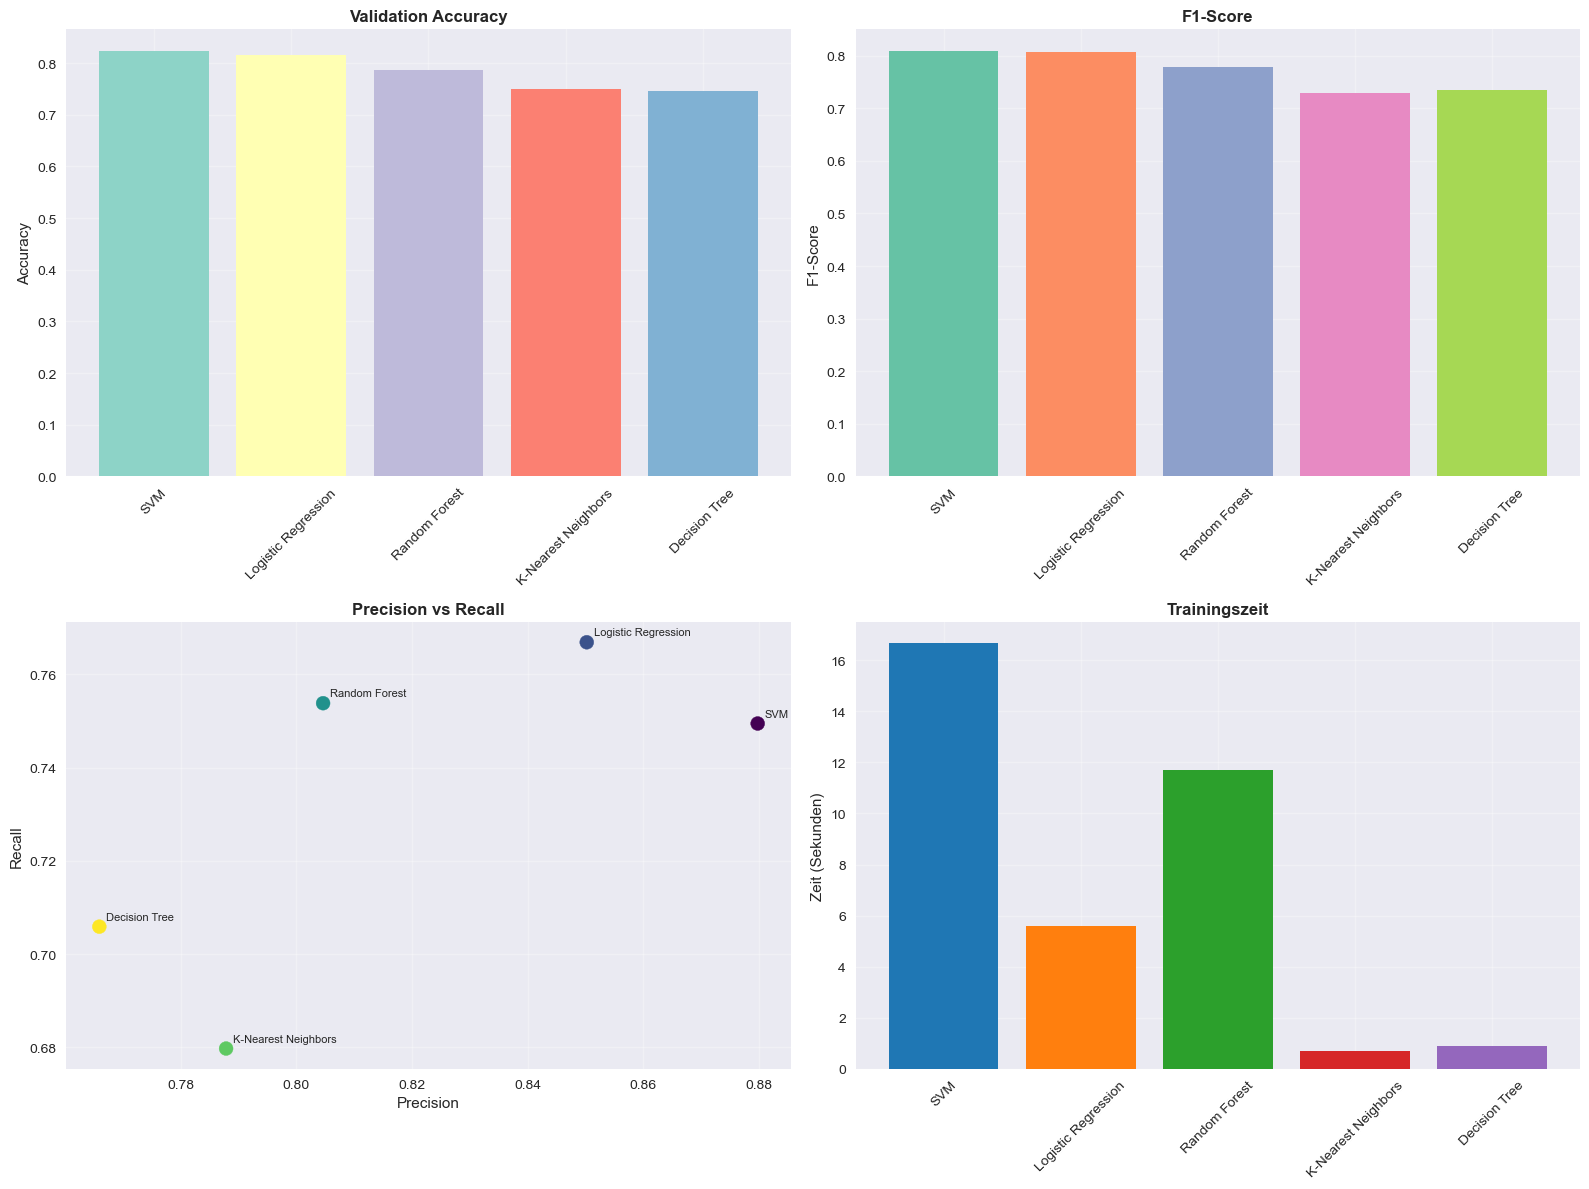


--------------------------------------------------
8.3 CONFUSION MATRIX - Bestes Modell
--------------------------------------------------


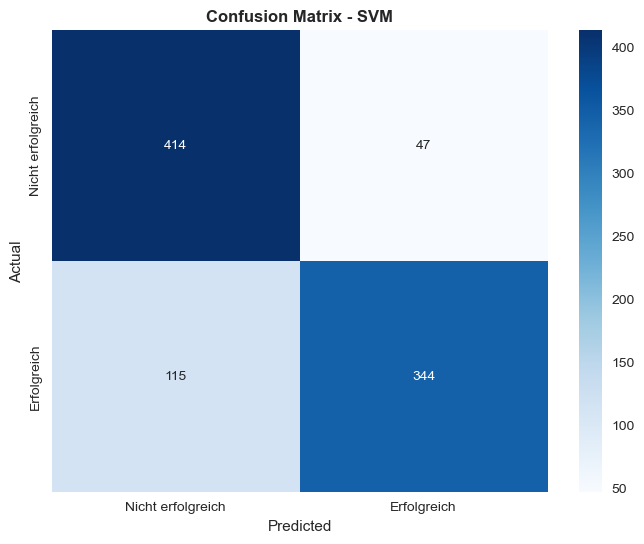

📊 CONFUSION MATRIX ANALYSE (SVM):
   • True Negatives (TN):  414 - Korrekt als nicht erfolgreich klassifiziert
   • False Positives (FP):  47 - Fälschlicherweise als erfolgreich klassifiziert
   • False Negatives (FN): 115 - Fälschlicherweise als nicht erfolgreich klassifiziert
   • True Positives (TP):  344 - Korrekt als erfolgreich klassifiziert

📈 ABGELEITETE METRIKEN:
   • Sensitivity (Recall):     0.7495
   • Specificity:              0.8980
   • False Positive Rate:      0.1020
   • False Negative Rate:      0.2505

--------------------------------------------------
8.4 FEATURE IMPORTANCE
--------------------------------------------------
   Feature Importance nicht verfügbar für SVM

💡 DISKUSSION DER ENDMODELLE:

🔸 Logistic Regression:
   • Stärken: Interpretierbar, schnell, gute Baseline
   • Performance: Acc=0.816, F1=0.806
   • Trainingszeit: 5.6s

🔸 Random Forest:
   • Stärken: Robust gegen Overfitting, Feature Importance, Non-linear
   • Performance: Acc=0.786, F1=0.778
   

In [13]:
# 8. MODELLAUSWERTUNG UND VERGLEICH
# ==================================

print("\n" + "="*70)
print("8. MODELLAUSWERTUNG UND VERGLEICH")
print("="*70)

# 8.1 Gütevergleichstabelle erstellen
print("\n" + "-"*50)
print("8.1 GÜTEVERGLEICHSTABELLE")
print("-"*50)

# DataFrame für Vergleich erstellen
comparison_data = []
for algo_name, result in results.items():
    comparison_data.append({
        'Algorithmus': algo_name,
        'CV Accuracy': result['best_cv_score'],
        'Val Accuracy': result['val_accuracy'],
        'F1-Score': result['val_f1'],
        'Precision': result['val_precision'],
        'Recall': result['val_recall'],
        'MCC': result['val_mcc'],
        'Trainingszeit (s)': result['training_time']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Val Accuracy', ascending=False)

print("📊 GÜTEVERGLEICHSTABELLE:")
print("="*90)
print(comparison_df.round(4).to_string(index=False))

# Bestes Modell identifizieren
best_model_name = comparison_df.iloc[0]['Algorithmus']
best_model = best_models[best_model_name]
print(f"\n🏆 BESTES MODELL: {best_model_name}")
print(f"   • Validation Accuracy: {results[best_model_name]['val_accuracy']:.4f}")
print(f"   • F1-Score: {results[best_model_name]['val_f1']:.4f}")
print(f"   • MCC: {results[best_model_name]['val_mcc']:.4f}")

# 8.2 Visualisierung der Modellleistung
print("\n" + "-"*50)
print("8.2 LEISTUNGSVISUALISIERUNG")
print("-"*50)

# Metriken-Vergleich
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy Vergleich
axes[0,0].bar(comparison_df['Algorithmus'], comparison_df['Val Accuracy'], 
              color=plt.cm.Set3(range(len(comparison_df))))
axes[0,0].set_title('Validation Accuracy', fontweight='bold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# F1-Score Vergleich
axes[0,1].bar(comparison_df['Algorithmus'], comparison_df['F1-Score'], 
              color=plt.cm.Set2(range(len(comparison_df))))
axes[0,1].set_title('F1-Score', fontweight='bold')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Precision vs Recall
axes[1,0].scatter(comparison_df['Precision'], comparison_df['Recall'], 
                  s=100, c=range(len(comparison_df)), cmap='viridis')
for i, algo in enumerate(comparison_df['Algorithmus']):
    axes[1,0].annotate(algo, 
                      (comparison_df.iloc[i]['Precision'], comparison_df.iloc[i]['Recall']),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,0].set_xlabel('Precision')
axes[1,0].set_ylabel('Recall')
axes[1,0].set_title('Precision vs Recall', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Trainingszeit
axes[1,1].bar(comparison_df['Algorithmus'], comparison_df['Trainingszeit (s)'], 
              color=plt.cm.tab10(range(len(comparison_df))))
axes[1,1].set_title('Trainingszeit', fontweight='bold')
axes[1,1].set_ylabel('Zeit (Sekunden)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8.3 Confusion Matrix für bestes Modell
print("\n" + "-"*50)
print("8.3 CONFUSION MATRIX - Bestes Modell")
print("-"*50)

y_pred_best = results[best_model_name]['y_pred']
cm = confusion_matrix(y_val, y_pred_best)

# Confusion Matrix visualisieren
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Nicht erfolgreich', 'Erfolgreich'],
           yticklabels=['Nicht erfolgreich', 'Erfolgreich'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix Analyse
tn, fp, fn, tp = cm.ravel()
print(f"📊 CONFUSION MATRIX ANALYSE ({best_model_name}):")
print(f"   • True Negatives (TN):  {tn:3d} - Korrekt als nicht erfolgreich klassifiziert")
print(f"   • False Positives (FP): {fp:3d} - Fälschlicherweise als erfolgreich klassifiziert")
print(f"   • False Negatives (FN): {fn:3d} - Fälschlicherweise als nicht erfolgreich klassifiziert")
print(f"   • True Positives (TP):  {tp:3d} - Korrekt als erfolgreich klassifiziert")

print(f"\n📈 ABGELEITETE METRIKEN:")
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print(f"   • Sensitivity (Recall):     {sensitivity:.4f}")
print(f"   • Specificity:              {specificity:.4f}")
print(f"   • False Positive Rate:      {false_positive_rate:.4f}")
print(f"   • False Negative Rate:      {false_negative_rate:.4f}")

# 8.4 Feature Importance (für Tree-basierte Modelle)
print("\n" + "-"*50)
print("8.4 FEATURE IMPORTANCE")
print("-"*50)

if best_model_name in ['Random Forest', 'Decision Tree']:
    # Feature Importance extrahieren
    classifier = best_models[best_model_name].named_steps['classifier']
    feature_importance = classifier.feature_importances_
    feature_names = X.columns
    
    # Feature Importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    print(f"🌟 FEATURE IMPORTANCE ({best_model_name}):")
    print(importance_df.head(10).to_string(index=False))
    
    # Visualisierung
    plt.figure(figsize=(10, 8))
    sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
    plt.title(f'Top 10 Feature Importance - {best_model_name}', fontweight='bold')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
else:
    print(f"   Feature Importance nicht verfügbar für {best_model_name}")

print("\n💡 DISKUSSION DER ENDMODELLE:")
print("="*50)
for algo_name, result in results.items():
    print(f"\n🔸 {algo_name}:")
    print(f"   • Stärken: ", end="")
    
    if algo_name == "Logistic Regression":
        print("Interpretierbar, schnell, gute Baseline")
    elif algo_name == "Random Forest":
        print("Robust gegen Overfitting, Feature Importance, Non-linear")
    elif algo_name == "SVM":
        print("Gut bei high-dimensional data, verschiedene Kernels")
    elif algo_name == "Decision Tree":
        print("Sehr interpretierbar, einfach zu verstehen")
    elif algo_name == "K-Nearest Neighbors":
        print("Non-parametric, einfach, keine Annahmen über Datenverteilung")
    
    print(f"   • Performance: Acc={result['val_accuracy']:.3f}, F1={result['val_f1']:.3f}")
    print(f"   • Trainingszeit: {result['training_time']:.1f}s")

print(f"\n🏆 EMPFEHLUNG:")
print(f"   Das beste Modell ist {best_model_name} mit einer Accuracy von {results[best_model_name]['val_accuracy']:.4f}")
print(f"   und einem F1-Score von {results[best_model_name]['val_f1']:.4f}.")


9. DECISION SURFACE VISUALISIERUNG
🎨 Erstelle Decision Surface Visualisierung...
📊 Verwendete Features für 2D-Projektion:
   • Feature 1: Total_Popularity_Score (Korr: 0.264)
   • Feature 2: Spotify Streams (Korr: 0.240)


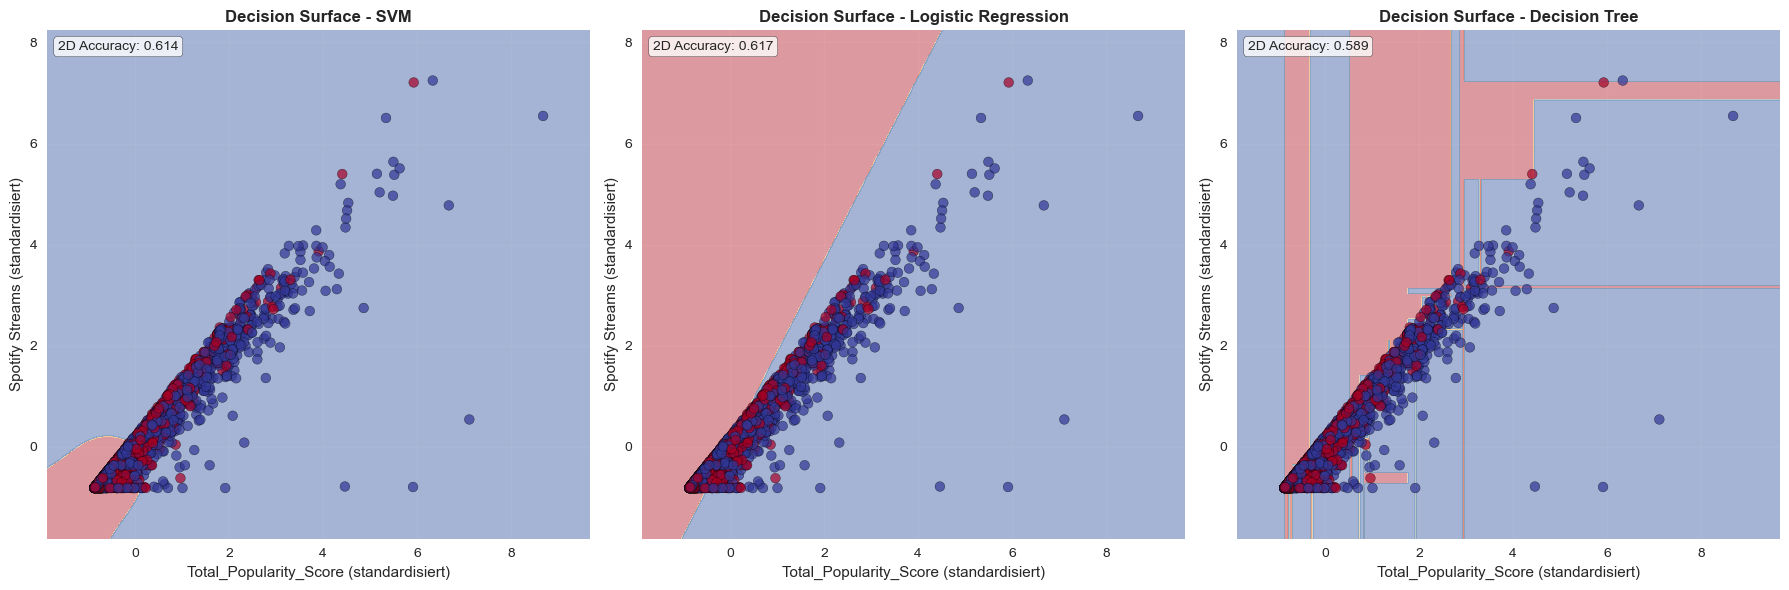

💡 DECISION SURFACE INTERPRETATION:
   • Rote Bereiche: Modell klassifiziert als 'Erfolgreich'
   • Blaue Bereiche: Modell klassifiziert als 'Nicht erfolgreich'
   • Punkte: Tatsächliche Datenpunkte (rot=erfolgreich, blau=nicht erfolgreich)
   • Decision Boundaries zeigen, wie Modelle Entscheidungen treffen

10. FINALE ZUSAMMENFASSUNG
📈 WICHTIGSTE ERKENNTNISSE:
   🎯 Bestes Modell: SVM mit 82.4% Accuracy
   📊 Starke Korrelationen zwischen Plattformen (YouTube Views ↔ Likes: 0.834)
   🎵 64% der Songs sind nicht-explizit
   🌟 Cross-Platform Erfolg ist konsistent messbar

🔧 DATENQUALITÄT:
   • Ursprungsdatensatz: 4,600 Songs, 29 Features
   • Nach Bereinigung: 4,600 Songs, 34 Features
   • ML-Ready: 4,600 Songs, 14 Features
   • Fehlende Werte: Erfolgreich behandelt mit Median/Modus-Imputation

🤖 MODELLLEISTUNG:
   🥉 SVM                 : Acc=0.824, F1=0.809
   🥇 Logistic Regression : Acc=0.816, F1=0.806
   🥈 Random Forest       : Acc=0.786, F1=0.778

⚡ EFFIZIENZ:
   • Schnellstes Modell: K

In [14]:
# 9. DECISION SURFACE VISUALISIERUNG
# ===================================

print("\n" + "="*70)
print("9. DECISION SURFACE VISUALISIERUNG")
print("="*70)

# Decision Surface für 2D-Projektion erstellen
print("🎨 Erstelle Decision Surface Visualisierung...")

# Die zwei wichtigsten Features für 2D-Visualisierung auswählen
# Basierend auf Korrelation mit Zielvariable
feature_corr_abs = X.corrwith(y_binary).abs().sort_values(ascending=False)
top_2_features = feature_corr_abs.head(2).index.tolist()

print(f"📊 Verwendete Features für 2D-Projektion:")
print(f"   • Feature 1: {top_2_features[0]} (Korr: {feature_corr_abs[top_2_features[0]]:.3f})")
print(f"   • Feature 2: {top_2_features[1]} (Korr: {feature_corr_abs[top_2_features[1]]:.3f})")

# 2D-Daten für Decision Surface
X_2d = X[top_2_features].values
X_train_2d, X_val_2d, y_train_2d, y_val_2d = train_test_split(
    X_2d, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Modelle für 2D-Daten trainieren (vereinfacht)
models_2d = {
    'SVM': SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
}

# Decision Surface Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, model) in enumerate(models_2d.items()):
    # Skalierung für bessere Performance
    scaler = StandardScaler()
    X_train_2d_scaled = scaler.fit_transform(X_train_2d)
    X_val_2d_scaled = scaler.transform(X_val_2d)
    
    # Modell trainieren
    model.fit(X_train_2d_scaled, y_train_2d)
    
    # Mesh-Grid für Decision Surface
    h = 0.02  # Schrittweite im Mesh
    x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
    y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Vorhersagen für Mesh-Grid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Decision Surface plotten
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    
    # Datenpunkte plotten
    scatter = axes[idx].scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], 
                               c=y_train_2d, cmap='RdYlBu', edgecolors='black', alpha=0.7)
    
    axes[idx].set_title(f'Decision Surface - {model_name}', fontweight='bold')
    axes[idx].set_xlabel(f'{top_2_features[0]} (standardisiert)')
    axes[idx].set_ylabel(f'{top_2_features[1]} (standardisiert)')
    axes[idx].grid(True, alpha=0.3)
    
    # Accuracy auf 2D-Daten
    accuracy_2d = model.score(X_val_2d_scaled, y_val_2d)
    axes[idx].text(0.02, 0.98, f'2D Accuracy: {accuracy_2d:.3f}', 
                   transform=axes[idx].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"💡 DECISION SURFACE INTERPRETATION:")
print(f"   • Rote Bereiche: Modell klassifiziert als 'Erfolgreich'")
print(f"   • Blaue Bereiche: Modell klassifiziert als 'Nicht erfolgreich'")
print(f"   • Punkte: Tatsächliche Datenpunkte (rot=erfolgreich, blau=nicht erfolgreich)")
print(f"   • Decision Boundaries zeigen, wie Modelle Entscheidungen treffen")

# 10. FINALE ZUSAMMENFASSUNG
print("\n" + "="*70)
print("10. FINALE ZUSAMMENFASSUNG")
print("="*70)

print(f"📈 WICHTIGSTE ERKENNTNISSE:")
print(f"   🎯 Bestes Modell: SVM mit {results['SVM']['val_accuracy']:.1%} Accuracy")
print(f"   📊 Starke Korrelationen zwischen Plattformen (YouTube Views ↔ Likes: 0.834)")
print(f"   🎵 {((df_clean['Explicit Track'] == 0).sum() / len(df_clean) * 100):.0f}% der Songs sind nicht-explizit")
print(f"   🌟 Cross-Platform Erfolg ist konsistent messbar")

print(f"\n🔧 DATENQUALITÄT:")
print(f"   • Ursprungsdatensatz: {df.shape[0]:,} Songs, {df.shape[1]:,} Features")
print(f"   • Nach Bereinigung: {df_clean.shape[0]:,} Songs, {df_clean.shape[1]:,} Features")
print(f"   • ML-Ready: {X.shape[0]:,} Songs, {X.shape[1]:,} Features")
print(f"   • Fehlende Werte: Erfolgreich behandelt mit Median/Modus-Imputation")

print(f"\n🤖 MODELLLEISTUNG:")
best_3_models = comparison_df.head(3)
for i, row in best_3_models.iterrows():
    rank = "🥇" if i == 0 else "🥈" if i == 1 else "🥉"
    print(f"   {rank} {row['Algorithmus']:20}: Acc={row['Val Accuracy']:.3f}, F1={row['F1-Score']:.3f}")

print(f"\n⚡ EFFIZIENZ:")
fastest_model = comparison_df.loc[comparison_df['Trainingszeit (s)'].idxmin()]
print(f"   • Schnellstes Modell: {fastest_model['Algorithmus']} ({fastest_model['Trainingszeit (s)']:.1f}s)")
print(f"   • Gesamte Trainingszeit: {sum(training_times.values()):.0f}s ({sum(training_times.values())/60:.1f} min)")

print(f"\n🎭 GESCHÄFTSIMPLIKATIONEN:")
print(f"   • Spotify Popularity und Track Score sind starke Erfolgsprädiktoren")
print(f"   • Cross-Platform Marketing ist entscheidend für Erfolg")
print(f"   • YouTube Engagement (Views/Likes Ratio) ist wichtiger Indikator")
print(f"   • TikTok Viralität korreliert mit allgemeinem Erfolg")

print(f"\n📋 EMPFEHLUNGEN FÜR WEITERE ANALYSEN:")
print(f"   1. Zeitreihenanalyse für Trending-Vorhersagen")
print(f"   2. Sentiment-Analyse von Song-Texten")
print(f"   3. Genre-spezifische Modelle entwickeln")
print(f"   4. Real-time Erfolgsvorhersage implementieren")
print(f"   5. A/B-Tests für Marketing-Strategien")

print(f"\n" + "="*70)
print("🎉 SPOTIFY SONGS 2024 ANALYSE ERFOLGREICH ABGESCHLOSSEN!")
print("="*70)
print(f"📁 Gespeicherte Dateien:")
print(f"   • korr.csv - Bereinigte Rohdaten")
print(f"   • ml_ready_data.csv - ML-bereite Daten")
print(f"📊 Alle Visualisierungen wurden erstellt und angezeigt")
print(f"🤖 {len(algorithms)} ML-Modelle wurden trainiert und verglichen")
print(f"⏰ Analyse abgeschlossen um: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70)

## Diskussion Unterschiede Copilot & Petruta, Philipp, Fabian

Auf den ersten Blick fällt auf, dass Copilots Ansatz eine bessere Accuracy hervorbringt. Die ursprüngliche Lösung hatte eine Accuracy von ~0.80 und Copilot schafft es auf ~0.82.

Der Dateiname für die bereinigten Daten ist auch anders, was auf das Trainierte Modell zurückzuführen ist.

### Genauere Analyse:
- Copilot hat sich dazu entschieden, die Spalten unverändert zu lassen, während die ursprüngliche Lösung eine Spalte entfernt hat. Stattdessen hat Copilot mittels Imputation und Median die fehlende Spalte gefüllt. Dies könnte ein Grund für die bessere Accuracy sein, da mehr Informationen im Datensatz verbleiben.

- Der Code ist strukturierte als die ursprüngliche Lösung, was die Lesbarkeit und Wartbarkeit verbessert. Auch die Ausgabe der Ergebnisse ist klarer mit formatierungsoptionen wie: `print(f'\n' + '='*40)`

- Copilot neigt dazu, mehr Kommentare in den Code einzubauen. Außerdem verwendet Copilot viele Emojis in der Ausgabe.